In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import cv2
from matplotlib.colors import rgb_to_hsv
import pandas as pd
import re

import seaborn as sns

/var/folders/00/6v4ypdjx7mlb7kcwyj2mg58m0000gn/T/ipykernel_2702/3210472232.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(f"billboard_stats.csv",  header=0)

In [3]:
def get_classification_count(df, column_name):
    
    df_counts = df[column_name].value_counts()
    
    total_count = df_counts.sum()
    df_percentages = (df_counts / total_count) #* 100

    summary = pd.DataFrame({
        'Count': df_counts,
        'Percentage': df_percentages
    })
    
    # Display the counts and percentages
    print(summary)

    return df_counts, df_percentages

In [4]:
def get_pivot_table(df, column_name):
    decade_counts = df.groupby(['decade', column_name]).size().reset_index(name='count')
    pivot_table = decade_counts.pivot(index='decade', columns=column_name, values='count').fillna(0)

    row_sums = pivot_table.sum(axis=1)
    pivot_table_percentage = (pivot_table.T / row_sums).T #* 100

    # Verify that the percentages sum to 100
    #assert (pivot_table_percentage.sum(axis=1).round() == 100).all(), "Percentages do not sum to 100."

    return pivot_table, pivot_table_percentage

def plot_decades_classification(pivot_table, pivot_table_percentage, genre, columns=4):
    unique_decades = sorted(set(pivot_table.index))

    # Calculate the number of required rows and columns for the subplot grid
    n_decades = len(unique_decades)
    n_columns = columns  # You can change the number of columns as per your requirement
    n_rows = (n_decades + n_columns - 1) // n_columns  # Ceiling division to get enough rows
    
    fig, axes = plt.subplots(n_rows, n_columns, figsize=(20, n_rows * 5), constrained_layout=True)
    
    # Ensure axes is a 2D array for easy indexing
    axes = np.array(axes).reshape(n_rows, n_columns)
    
    # Flatten the axes array for easy iteration and hide unused subplots
    ax_iter = np.ravel(axes)
    for ax in ax_iter[n_decades:]:
        ax.set_visible(False)  # Hide unused axes
    
    for i, decade in enumerate(unique_decades):
        ax = ax_iter[i]  # Get the corresponding subplot for the current decade
    
        # Plot Pop bar plot
        if decade in pivot_table.index:
            counts_pop = pivot_table.loc[decade]
            counts_pop.plot(kind='bar', color='skyblue', ax=ax, label='Frequency')
        
        # Plot Pop line plot on the same axes
        if decade in pivot_table_percentage.index:
            percentages_pop = pivot_table_percentage.loc[decade]
            percentages_pop.plot(kind='line', marker='o', color='darkorange', ax=ax, secondary_y=True, label='Percentage', linewidth=2)
        
        # Set title and labels
        ax.set_title(f'{genre} {decade}s')
        ax.set_ylabel('Frequency')
        ax.right_ax.set_ylabel('Percentage')  # Set label for the secondary y-axis

        # Set legends
        ax.legend(loc='upper left')
        ax.right_ax.legend(loc='upper right')
    
    plt.show()


In [5]:
def map_year_to_decade(year):
    return (year // 10) * 10
    
df['decade'] = df['year'].apply(map_year_to_decade)

In [9]:
print("------------------------- whole dataset artist_name -------------------------")
year_counts = df['artist_name'].value_counts()
year_counts_df = year_counts.reset_index()
year_counts_df['Percentage'] = round((year_counts_df['count'] * 100) / len(df), 3)
year_counts_df #1221

------------------------- whole dataset artist_name -------------------------


,artist_name,count,Percentage
0,Soundtrack,149,4.760
1,Various Artists,112,3.578
2,Kidz Bop Kids,21,0.671
3,The Beatles,17,0.543
4,The Rolling Stones,14,0.447
...,...,...,...
1216,Carl Thomas,1,0.032
1217,Jay-Z/Linkin Park,1,0.032
1218,Mike Jones,1,0.032
1219,Jesse McCartney,1,0.032


In [10]:
unique_values_count = df['artist_name'].nunique()
print(unique_values_count)

1221


In [105]:
print("------------------------- whole dataset -------------------------")
year_counts = df['year'].value_counts()
year_counts_df = year_counts.reset_index()
year_counts_df['Percentage'] = round((year_counts_df['count'] * 100) / len(df), 3)
year_counts_df[:60]

------------------------- whole dataset -------------------------


,year,count,Percentage
0,2002,182,5.815
1,2003,157,5.016
2,2006,150,4.792
3,2005,149,4.760
4,2004,145,4.633
5,2007,141,4.505
6,2009,141,4.505
7,2008,137,4.377
8,2011,130,4.153
9,2013,125,3.994


In [107]:
print("------------------------- whole dataset -------------------------")
decade_counts = df['decade'].value_counts()
decade_counts_df = decade_counts.reset_index()
decade_counts_df['Percentage'] = round((decade_counts_df['count'] ) / len(df), 3)
decade_counts_df

------------------------- whole dataset -------------------------


,decade,count,Percentage
0,2000,1245,0.398
1,2010,1097,0.350
2,2020,249,0.080
3,1990,167,0.053
4,1970,125,0.040
5,1980,96,0.031
6,1960,81,0.026
7,1950,55,0.018
8,1940,15,0.005


In [22]:
genres_series = df['big_genres'].str.split(', ').explode()

unique_genres = genres_series.unique()
unique_genres_df = pd.DataFrame(unique_genres, columns=['Unique Genres'])
unique_genres_df.sort_values(by='Unique Genres', inplace=True)
unique_genres_df.reset_index(drop=True, inplace=True)

genres_list = unique_genres_df['Unique Genres'].tolist()


In [108]:
genre_counts = {genre: 0 for genre in genres_list}

# Iterate through each row of the dataframe
for index, row in df.iterrows():
    # This assumes that each cell in 'big_genres' is a string of genres separated by commas
    genres = row['big_genres'].split(',')
    # Count each genre
    for genre in genres:
        genre = genre.strip()  # Remove any leading/trailing whitespace
        if genre in genre_counts:
            genre_counts[genre] += 1

genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])
genre_counts_df['Percentage'] = round((genre_counts_df['Count'] ) / len(df), 3)
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)
genre_counts_df.reset_index(drop=True, inplace=True)

frequent_genres = genre_counts_df['Genre'][:30].tolist()
genre_counts_df

,Genre,Count,Percentage
0,Rock,785,0.251
1,Pop,771,0.246
2,Hip Hop,623,0.199
3,Country,345,0.110
4,RnB,213,0.068
5,Electronic,155,0.050
6,Show Tunes,136,0.043
7,Soul,129,0.041
8,Metal,120,0.038
9,Jazz,77,0.025


In [112]:
frequent_genres

['Rock',
 'Pop',
 'Hip Hop',
 'Country',
 'RnB',
 'Electronic',
 'Show Tunes',
 'Soul',
 'Metal',
 'Jazz',
 'Rap',
 'Folk',
 'Various Artists',
 'Funk',
 'Latin',
 'World Music',
 'Rock And Roll',
 'Christian',
 'Classical',
 'Childrens',
 'Christmas',
 'K-Pop',
 'Comedy',
 'Blues',
 'Easy Listening',
 'Vocal',
 'Reggae',
 'African',
 'Disco',
 'Ballad']

In [ ]:
for gen in frequent_genres:
    print(f"--------------   {gen}   -------------- ")
    genre_df = df[df['big_genres'].str.contains(gen, na=False)]
    genre_value_counts = genre_df['location'].value_counts(dropna=True)
    
    genre_value_counts_df = genre_value_counts.reset_index()
    genre_value_counts_df['Percentage'] = round((genre_value_counts_df['count'] ) / genre_value_counts_df['count'].sum(), 3)
    print(genre_value_counts_df)
    #genre_frequent_countries = genre_value_counts_df['location'][:11].tolist()
    

In [ ]:
frequent_genres = frequent_genres[:10]

### contrast_classification

In [ ]:
for gen in frequent_genres:
    print(f"--------------   {gen}   -------------- ")
    genre_df = df[df['big_genres'].str.contains(gen, na=False)]
    df_counts, df_percentages = get_classification_count(genre_df,'contrast_classification')

    pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, 'contrast_classification')
    #print(pivot_table_p)
    #print(pivot_table_percentage_p)
    plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### dissimilarity_classification


In [ ]:
for gen in frequent_genres:
    print(f"--------------   {gen}   -------------- ")
    column_name = "dissimilarity_classification"
    genre_df = df[df['big_genres'].str.contains(gen, na=False)]
    df_counts, df_percentages = get_classification_count(genre_df,column_name)

    pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
    #print(pivot_table_p)
    #print(pivot_table_percentage_p)
    plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### homogeneity_classification


In [ ]:
for gen in frequent_genres:
    print(f"--------------   {gen}   -------------- ")
    column_name = "homogeneity_classification"
    genre_df = df[df['big_genres'].str.contains(gen, na=False)]
    df_counts, df_percentages = get_classification_count(genre_df,column_name)

    pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
    #print(pivot_table_p)
    #print(pivot_table_percentage_p)
    plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### energy_classification


In [ ]:
for gen in frequent_genres:
    print(f"--------------   {gen}   -------------- ")
    column_name = "energy_classification"
    genre_df = df[df['big_genres'].str.contains(gen, na=False)]
    df_counts, df_percentages = get_classification_count(genre_df,column_name)

    pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
    #print(pivot_table_p)
    #print(pivot_table_percentage_p)
    plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### 	correlation_classification


In [ ]:
for gen in frequent_genres:
    print(f"--------------   {gen}   -------------- ")
    column_name = "correlation_classification"
    genre_df = df[df['big_genres'].str.contains(gen, na=False)]
    df_counts, df_percentages = get_classification_count(genre_df,column_name)

    pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
    #print(pivot_table_p)
    #print(pivot_table_percentage_p)
    plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### use_space_classification


In [ ]:
for gen in frequent_genres:
    print(f"--------------   {gen}   -------------- ")
    column_name = "use_space_classification"
    genre_df = df[df['big_genres'].str.contains(gen, na=False)]
    df_counts, df_percentages = get_classification_count(genre_df,column_name)

    pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
    #print(pivot_table_p)
    #print(pivot_table_percentage_p)
    plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### 	simmetry_classification


In [ ]:
for gen in frequent_genres:
    print(f"--------------   {gen}   -------------- ")
    column_name = "simmetry_classification"
    genre_df = df[df['big_genres'].str.contains(gen, na=False)]
    df_counts, df_percentages = get_classification_count(genre_df,column_name)

    pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
    #print(pivot_table_p)
    #print(pivot_table_percentage_p)
    plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### warm_cool_palette


In [ ]:
for gen in frequent_genres:
    print(f"--------------   {gen}   -------------- ")
    column_name = "warm_cool_palette"
    genre_df = df[df['big_genres'].str.contains(gen, na=False)]
    df_counts, df_percentages = get_classification_count(genre_df,column_name)

    pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
    #print(pivot_table_p)
    #print(pivot_table_percentage_p)
    plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### type_palette


In [ ]:
for gen in frequent_genres:
    print(f"--------------   {gen}   -------------- ")
    column_name = "type_palette"
    genre_df = df[df['big_genres'].str.contains(gen, na=False)]
    df_counts, df_percentages = get_classification_count(genre_df,column_name)

    pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
    #print(pivot_table_p)
    #print(pivot_table_percentage_p)
    plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

## Country analysis

In [126]:
value_counts = df['location'].value_counts(dropna=True)
value_counts_df = value_counts.reset_index()
value_counts_df['Percentage'] = round((value_counts_df['count'] * value_counts_df['count'].sum()) / 3322, 3)
frequent_countries = value_counts_df['location'].tolist()
value_counts_df

,location,count,Percentage
0,United States,2224,1914.702
1,United Kingdom,216,185.960
2,Germany,153,131.722
3,Canada,103,88.675
4,Australia,39,33.576
5,Ireland,23,19.801
6,"Korea, Republic of",18,15.497
7,Puerto Rico,16,13.775
8,Italy,12,10.331
9,France,9,7.748


In [151]:
frequent_countries = frequent_countries[:11]
frequent_countries

['United States',
 'United Kingdom',
 'Germany',
 'Canada',
 'Australia',
 'Ireland',
 'Korea, Republic of',
 'Puerto Rico',
 'Italy',
 'France',
 'Colombia']

In [129]:
lists_countries = {}

for country in frequent_countries:
    country_df = df[df['location']==country]

    genre_counts = {genre: 0 for genre in genres_list}

    for index, row in country_df.iterrows():
        # This assumes that each cell in 'big_genres' is a string of genres separated by commas
        genres = row['big_genres'].split(',')
        # Count each genre
        for genre in genres:
            genre = genre.strip()  # Remove any leading/trailing whitespace
            if genre in genre_counts:
                genre_counts[genre] += 1
    
    genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])
    genre_counts_df['Percentage'] = round((genre_counts_df['Count'] ) / genre_counts_df['Count'].sum(), 3)
    genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)
    genre_counts_df.reset_index(drop=True, inplace=True)
    print(f"-------------- {country} ---------------")
    print(genre_counts_df[genre_counts_df['Count']>0])
    country_genres_list = genre_counts_df['Genre'][:5].tolist()
    lists_countries[country] = country_genres_list
    


-------------- United States ---------------
             Genre  Count  Percentage
0          Hip Hop    532       0.200
1              Pop    521       0.196
2             Rock    490       0.184
3          Country    324       0.122
4              RnB    171       0.064
5             Soul    108       0.041
6            Metal    107       0.040
7       Electronic     65       0.024
8             Jazz     58       0.022
9              Rap     52       0.020
10            Folk     31       0.012
11            Funk     29       0.011
12       Childrens     21       0.008
13       Christian     19       0.007
14   Rock And Roll     17       0.006
15      Show Tunes     16       0.006
16           Latin     16       0.006
17          Comedy     15       0.006
18       Christmas     13       0.005
19           Blues     12       0.005
20     World Music     11       0.004
21  Easy Listening     11       0.004
22           Vocal      8       0.003
23       Classical      6       0.002
24   

In [104]:
frequent_countries = frequent_countries[:11]

### contrast_classification

In [ ]:
for country in frequent_countries:
    country_df = df[df['location']==country]
    print(f" ***************** {country} ******************+")
    genre_list_country = lists_countries[country]
    for gen in genre_list_country:
        print(f"--------------   {gen}   -------------- ")
        genre_df = country_df[country_df['big_genres'].str.contains(gen, na=False)]
        df_counts, df_percentages = get_classification_count(genre_df,'contrast_classification')
    
        pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, 'contrast_classification')
        #print(pivot_table_p)
        #print(pivot_table_percentage_p)
        plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### dissimilarity_classification

In [ ]:
for country in frequent_countries:
    country_df = df[df['location']==country]
    print(f" ***************** {country} ******************+")
    genre_list_country = lists_countries[country]
    for gen in genre_list_country:
        print(f"--------------   {gen}   -------------- ")
        column_name = "dissimilarity_classification"
        genre_df = country_df[country_df['big_genres'].str.contains(gen, na=False)]
        #genre_df = genre_df[genre_df['count']>0]
        df_counts, df_percentages = get_classification_count(genre_df,column_name)
    
        pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
        #print(pivot_table_p)
        #print(pivot_table_percentage_p)
        plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### homogeneity_classification

 ***************** United States ******************+
--------------   Hip Hop   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                 350    0.657895
Somewhat Homogeneous          168    0.315789
Homogeneous                    14    0.026316


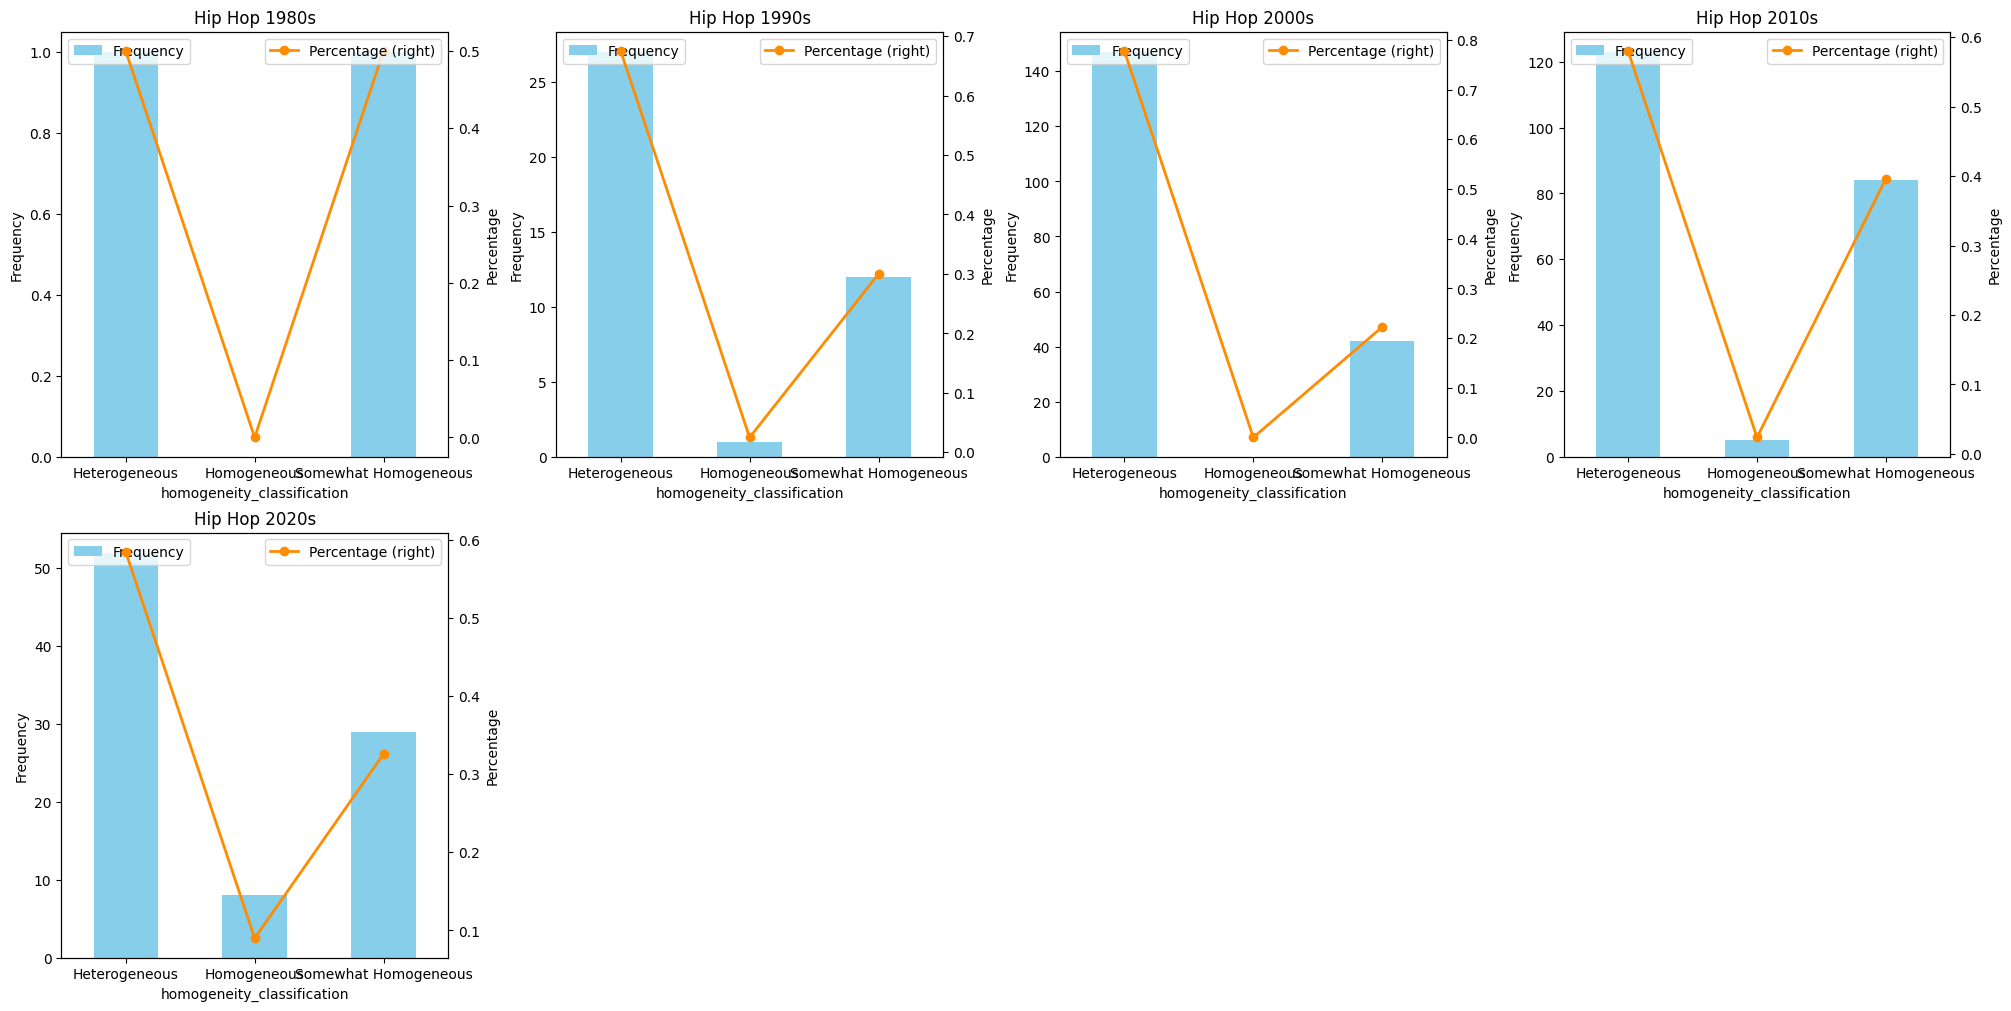

--------------   Pop   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                 337    0.646833
Somewhat Homogeneous          174    0.333973
Homogeneous                    10    0.019194


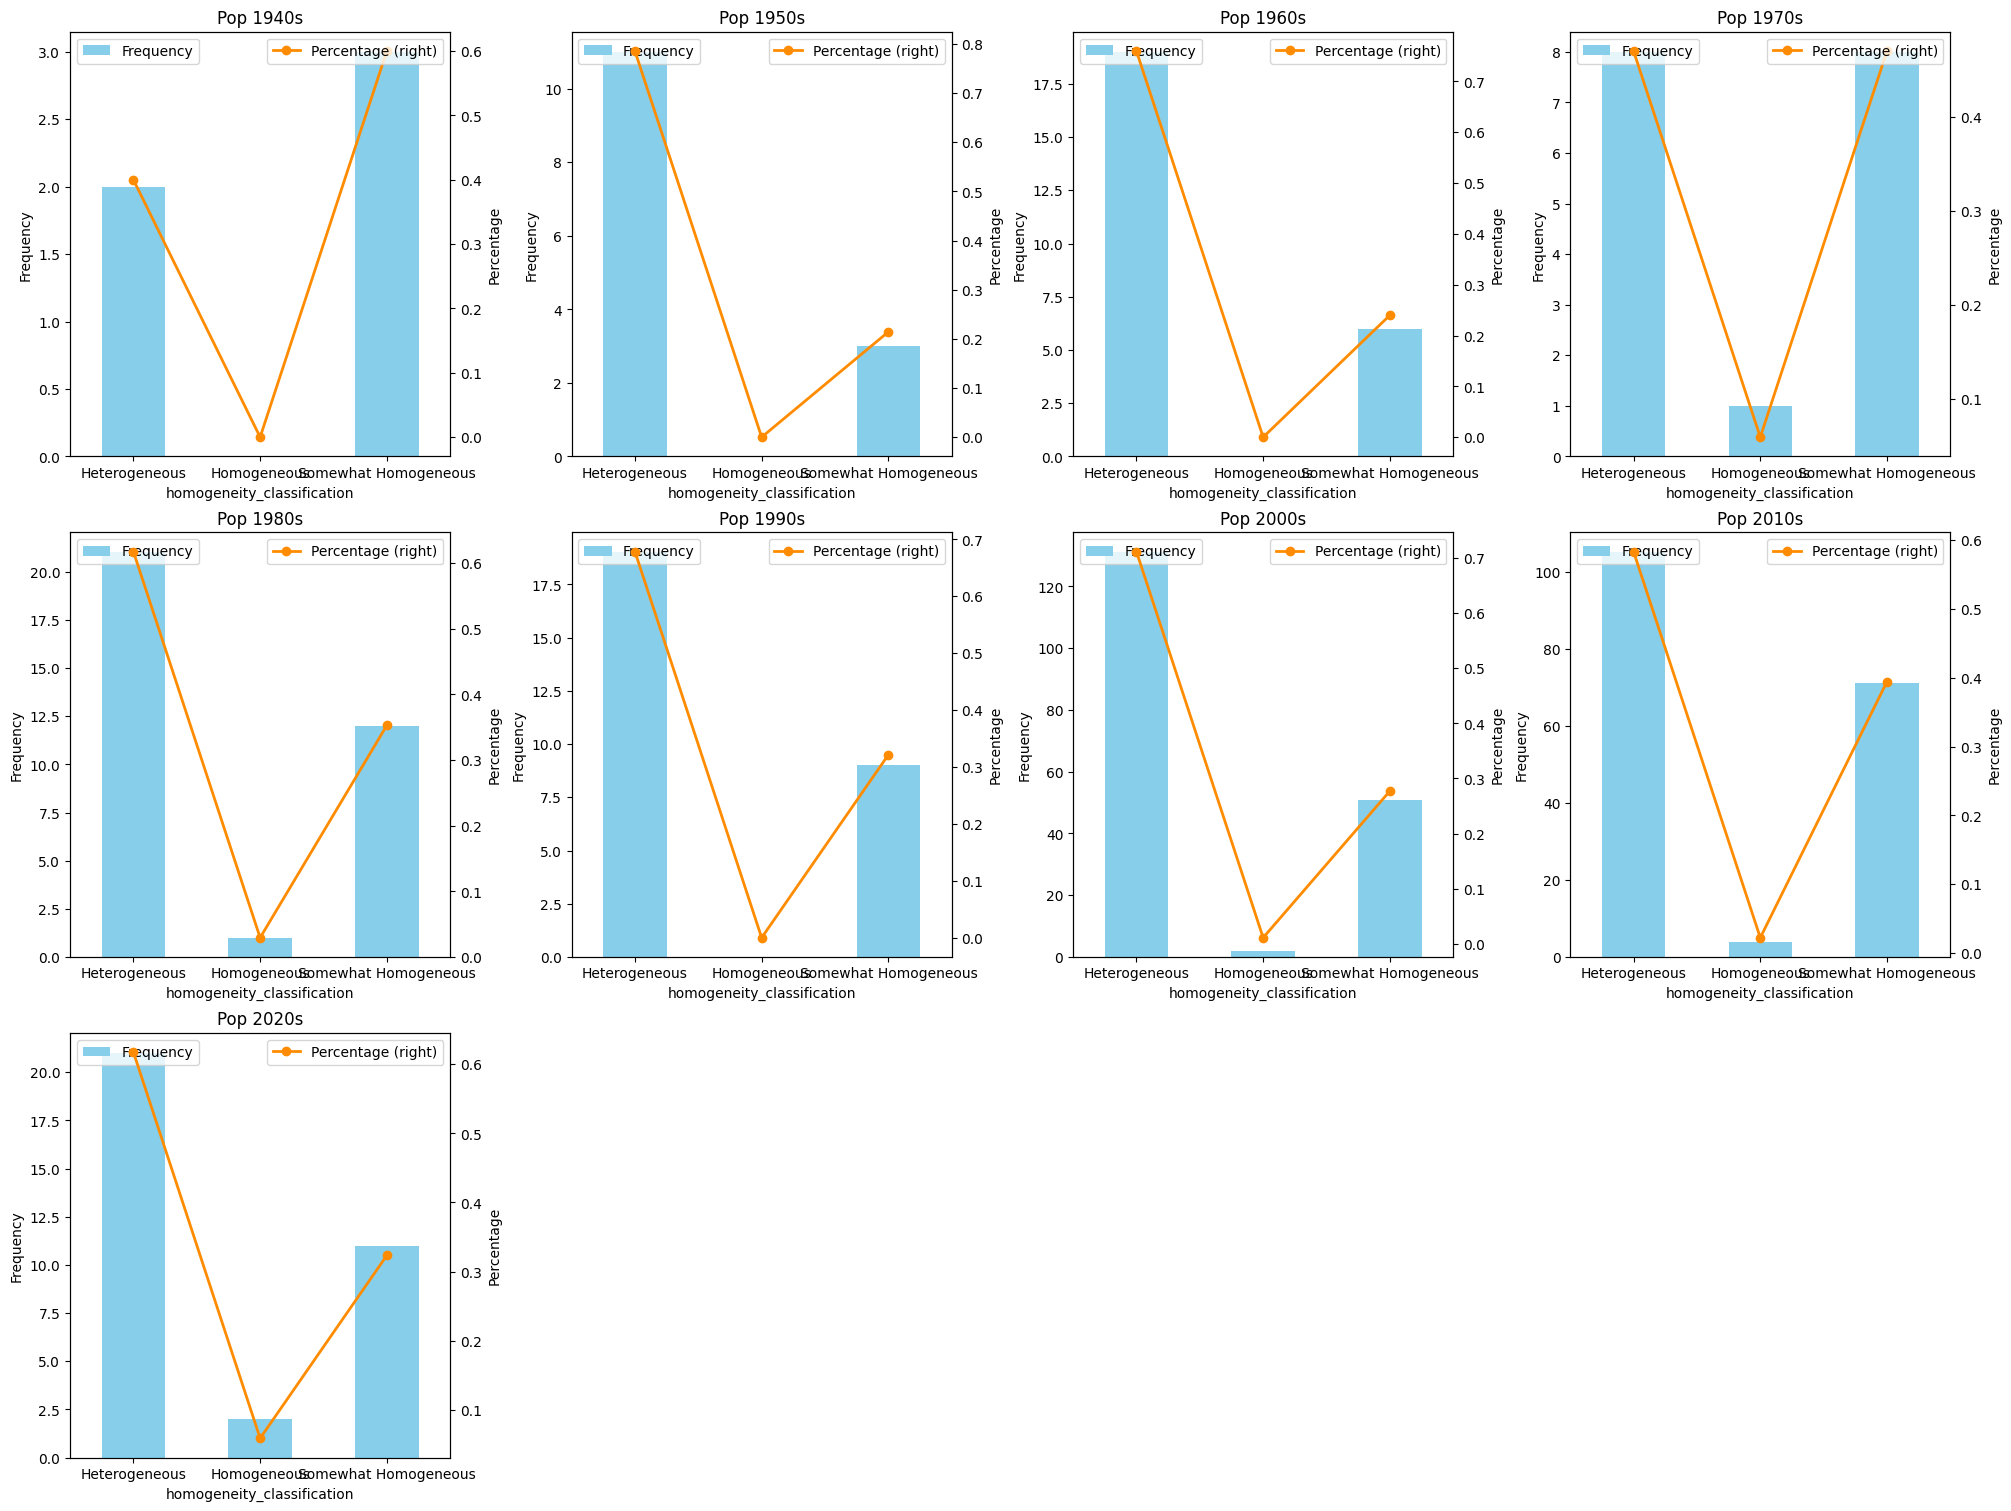

--------------   Rock   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                 315    0.640244
Somewhat Homogeneous          159    0.323171
Homogeneous                    18    0.036585


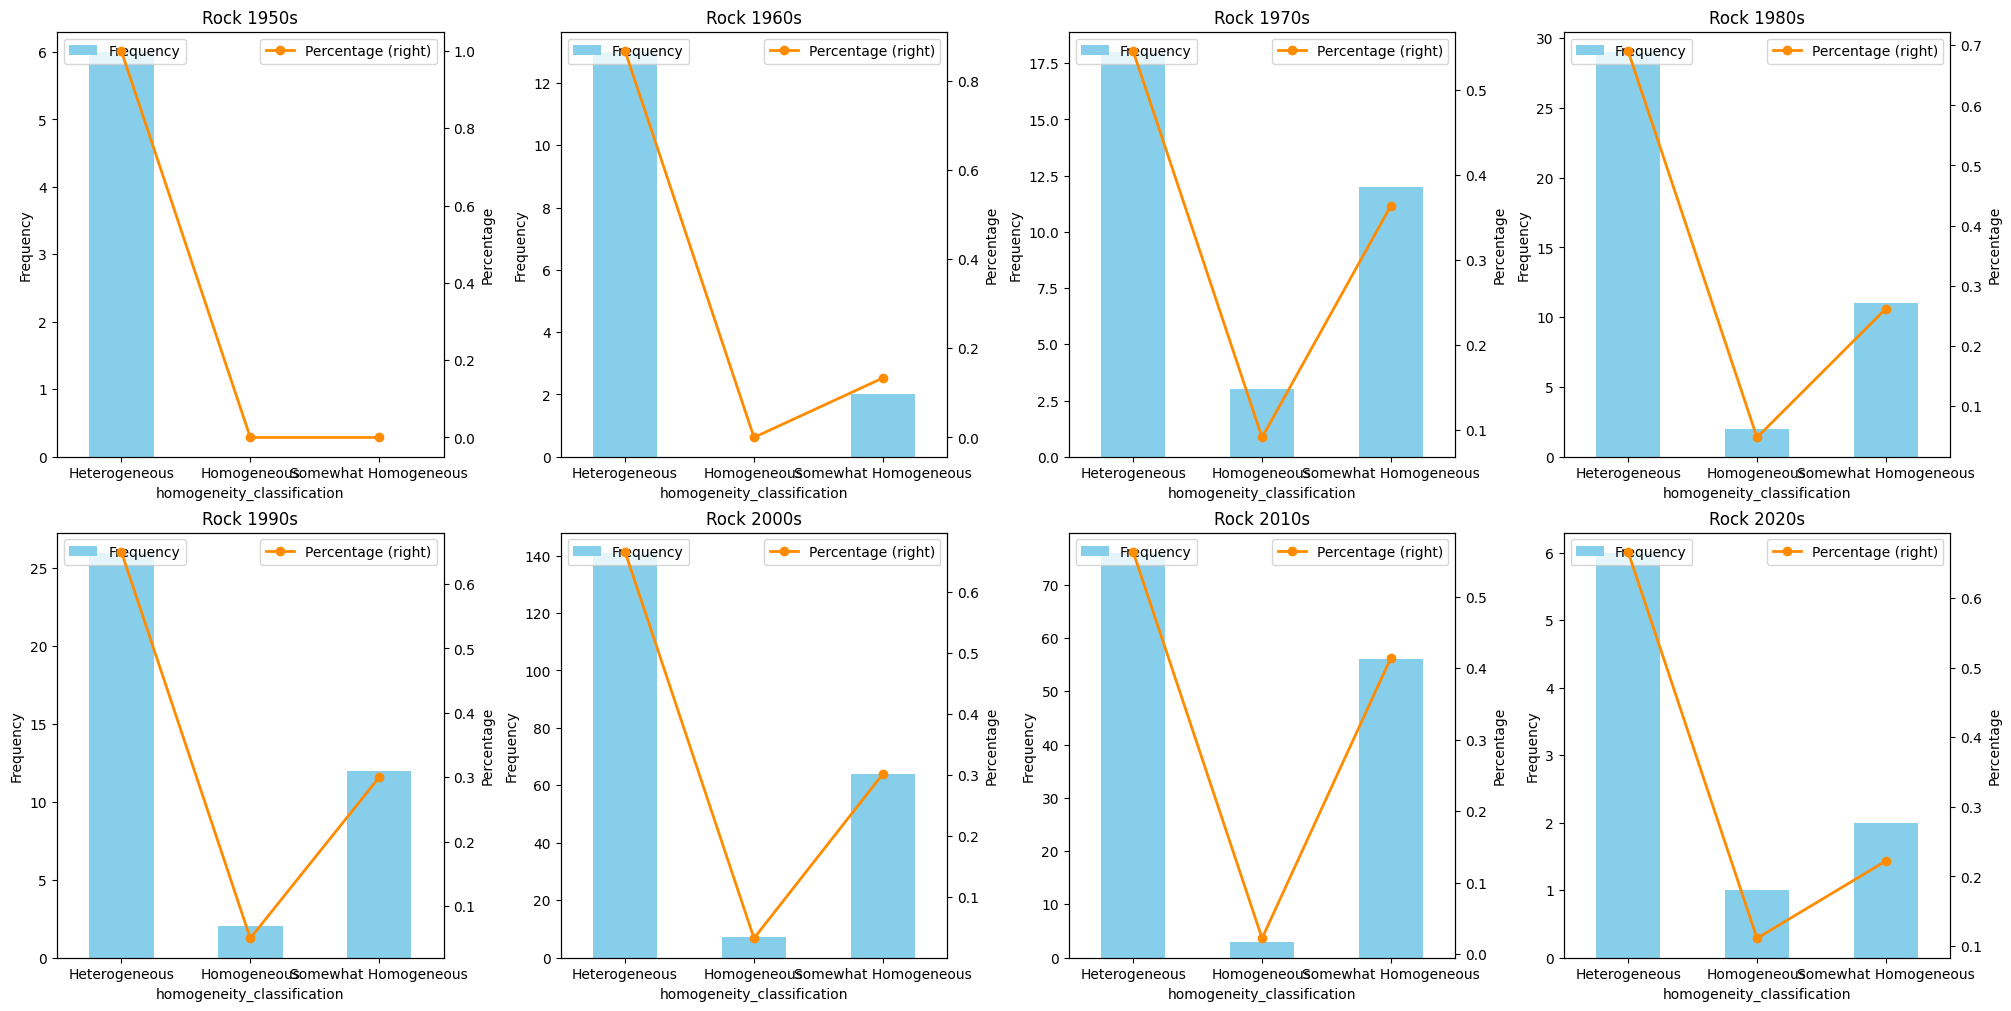

--------------   Country   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                 244    0.753086
Somewhat Homogeneous           77    0.237654
Homogeneous                     3    0.009259


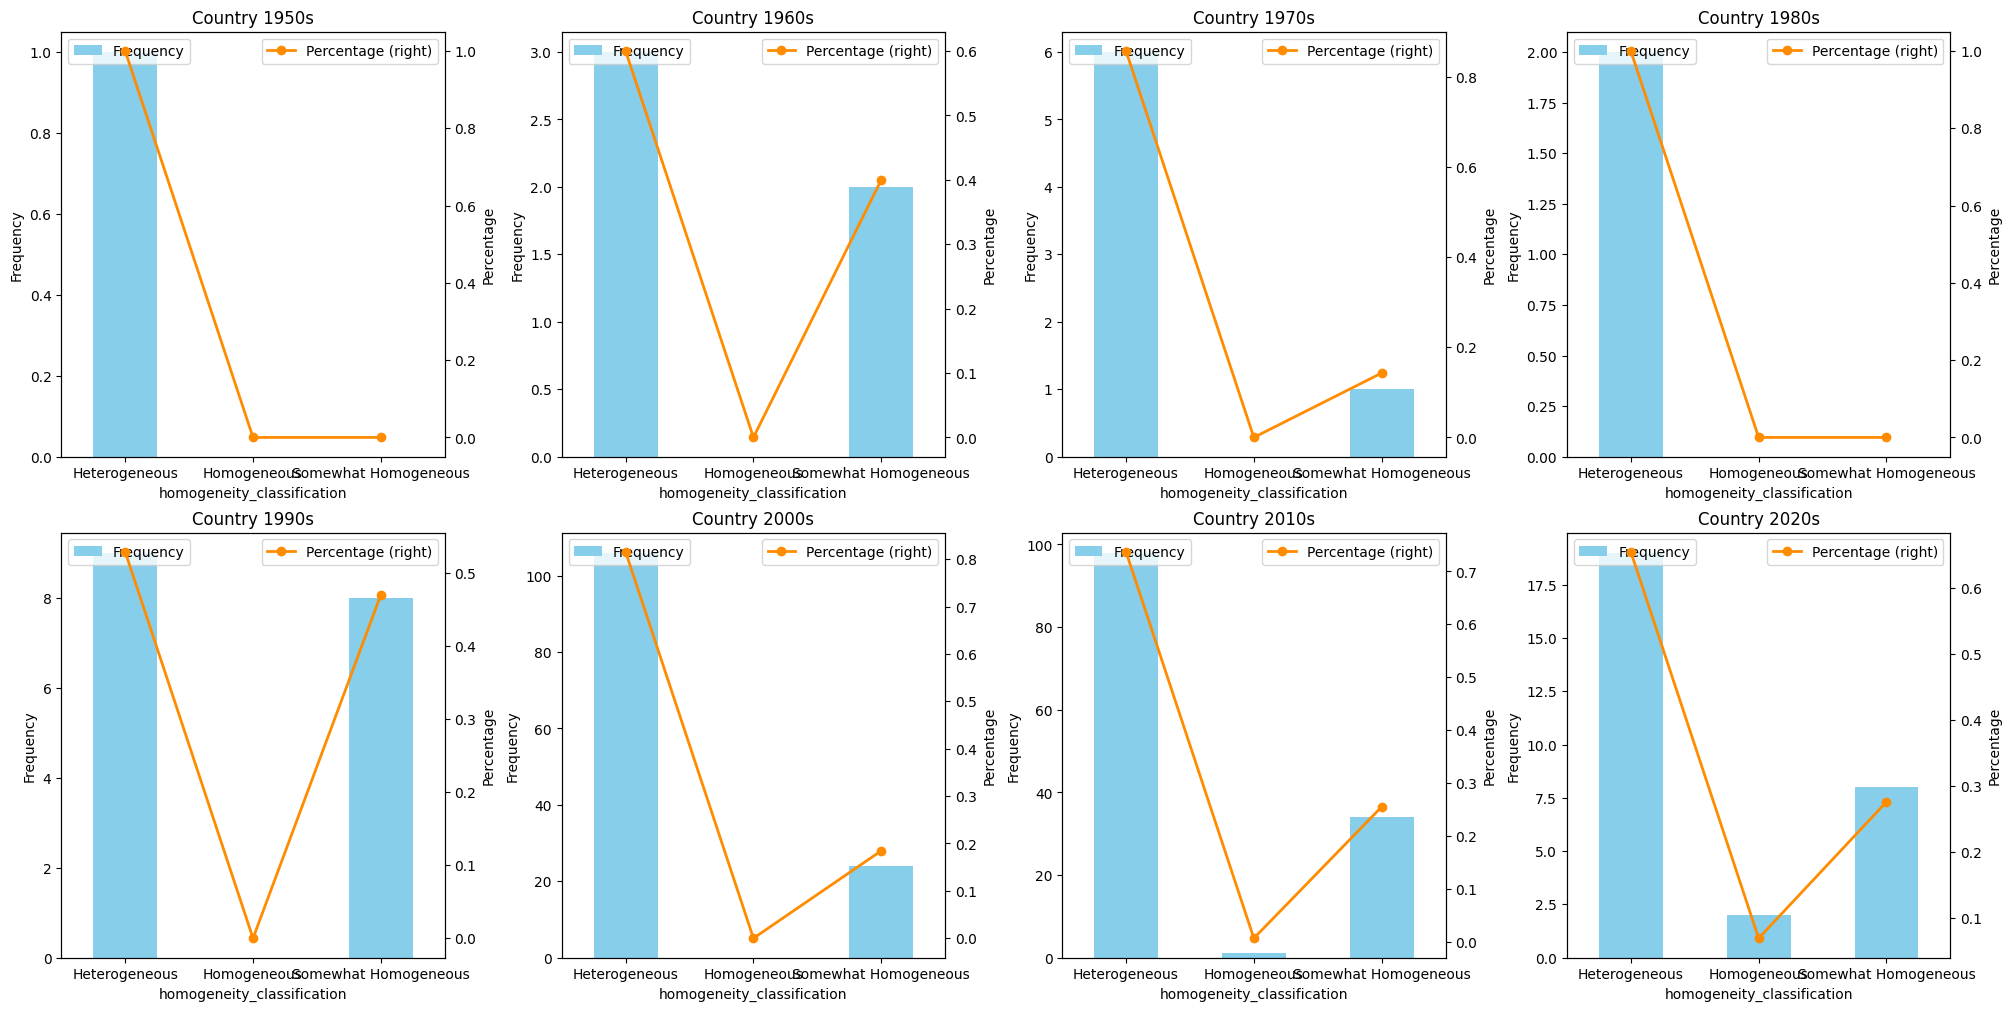

--------------   RnB   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                 104    0.608187
Somewhat Homogeneous           64    0.374269
Homogeneous                     3    0.017544


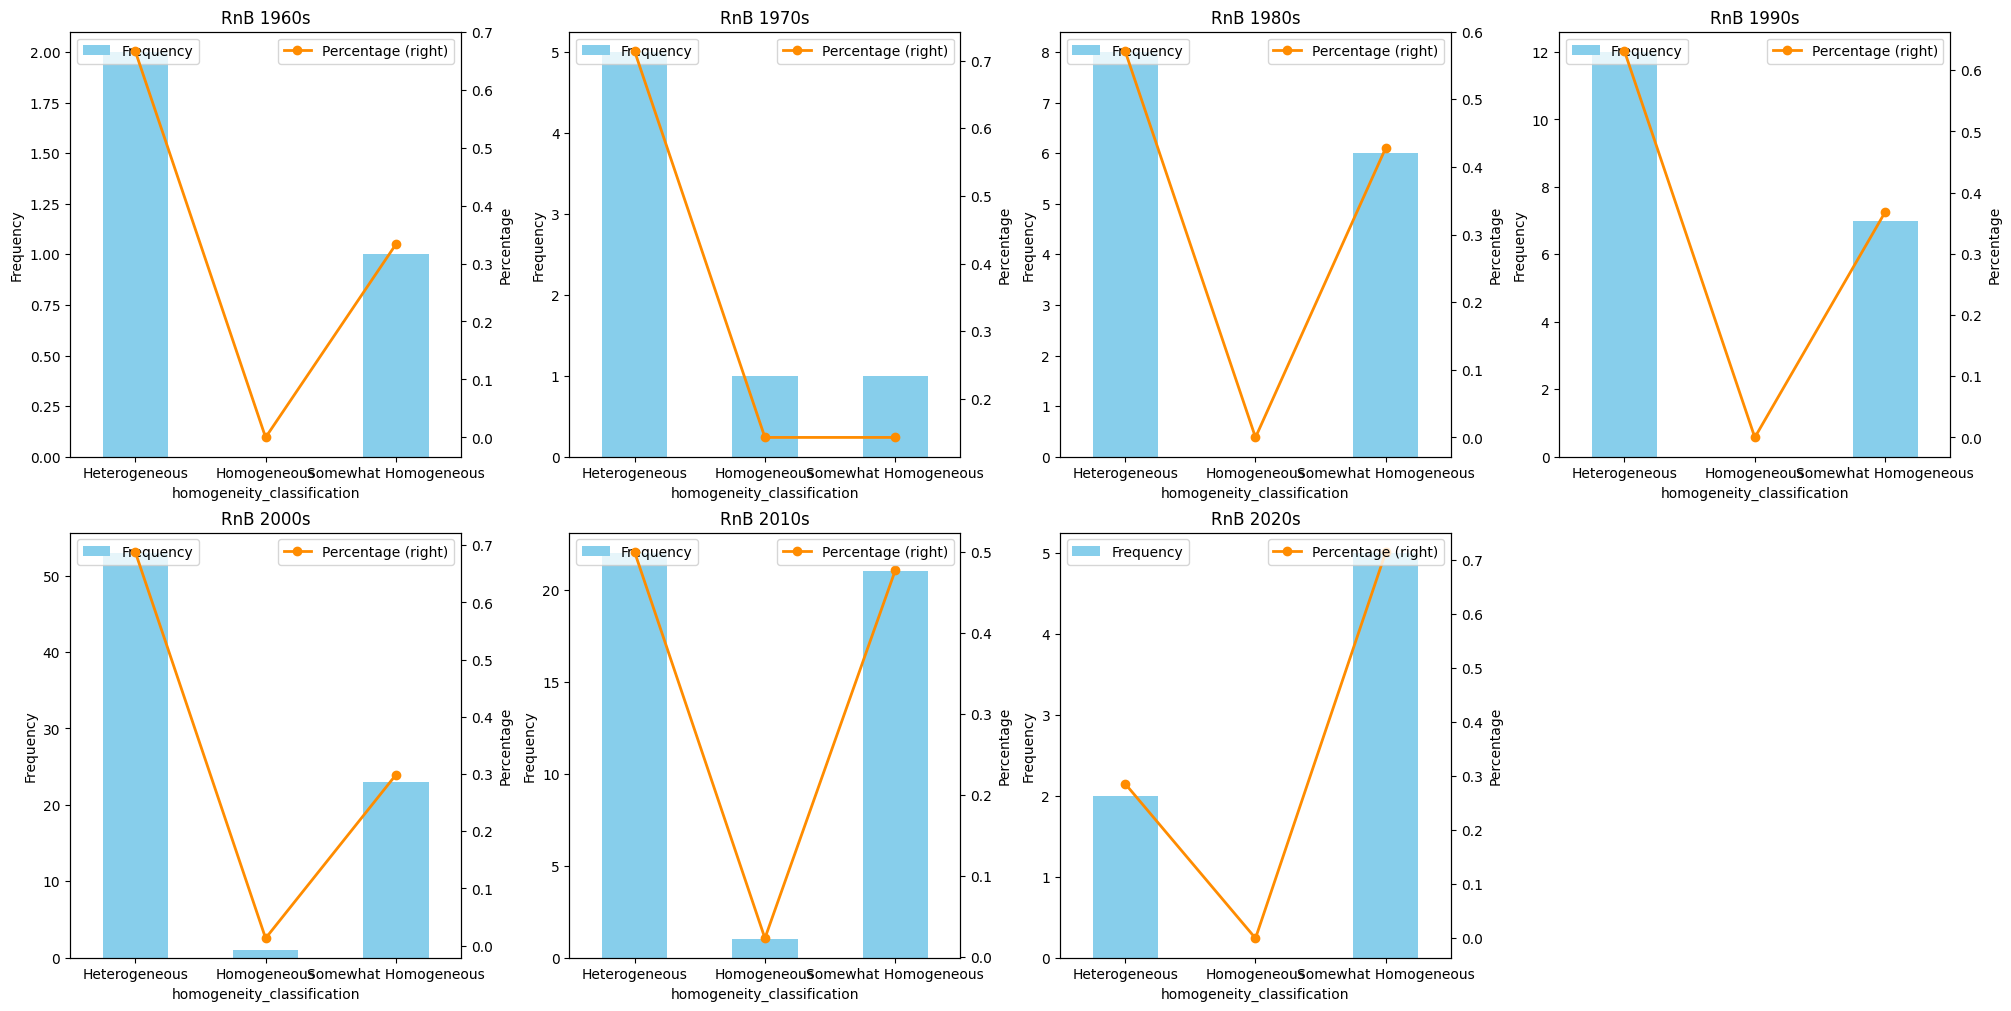

 ***************** United Kingdom ******************+
--------------   Rock   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                  77    0.596899
Somewhat Homogeneous           42    0.325581
Homogeneous                    10    0.077519


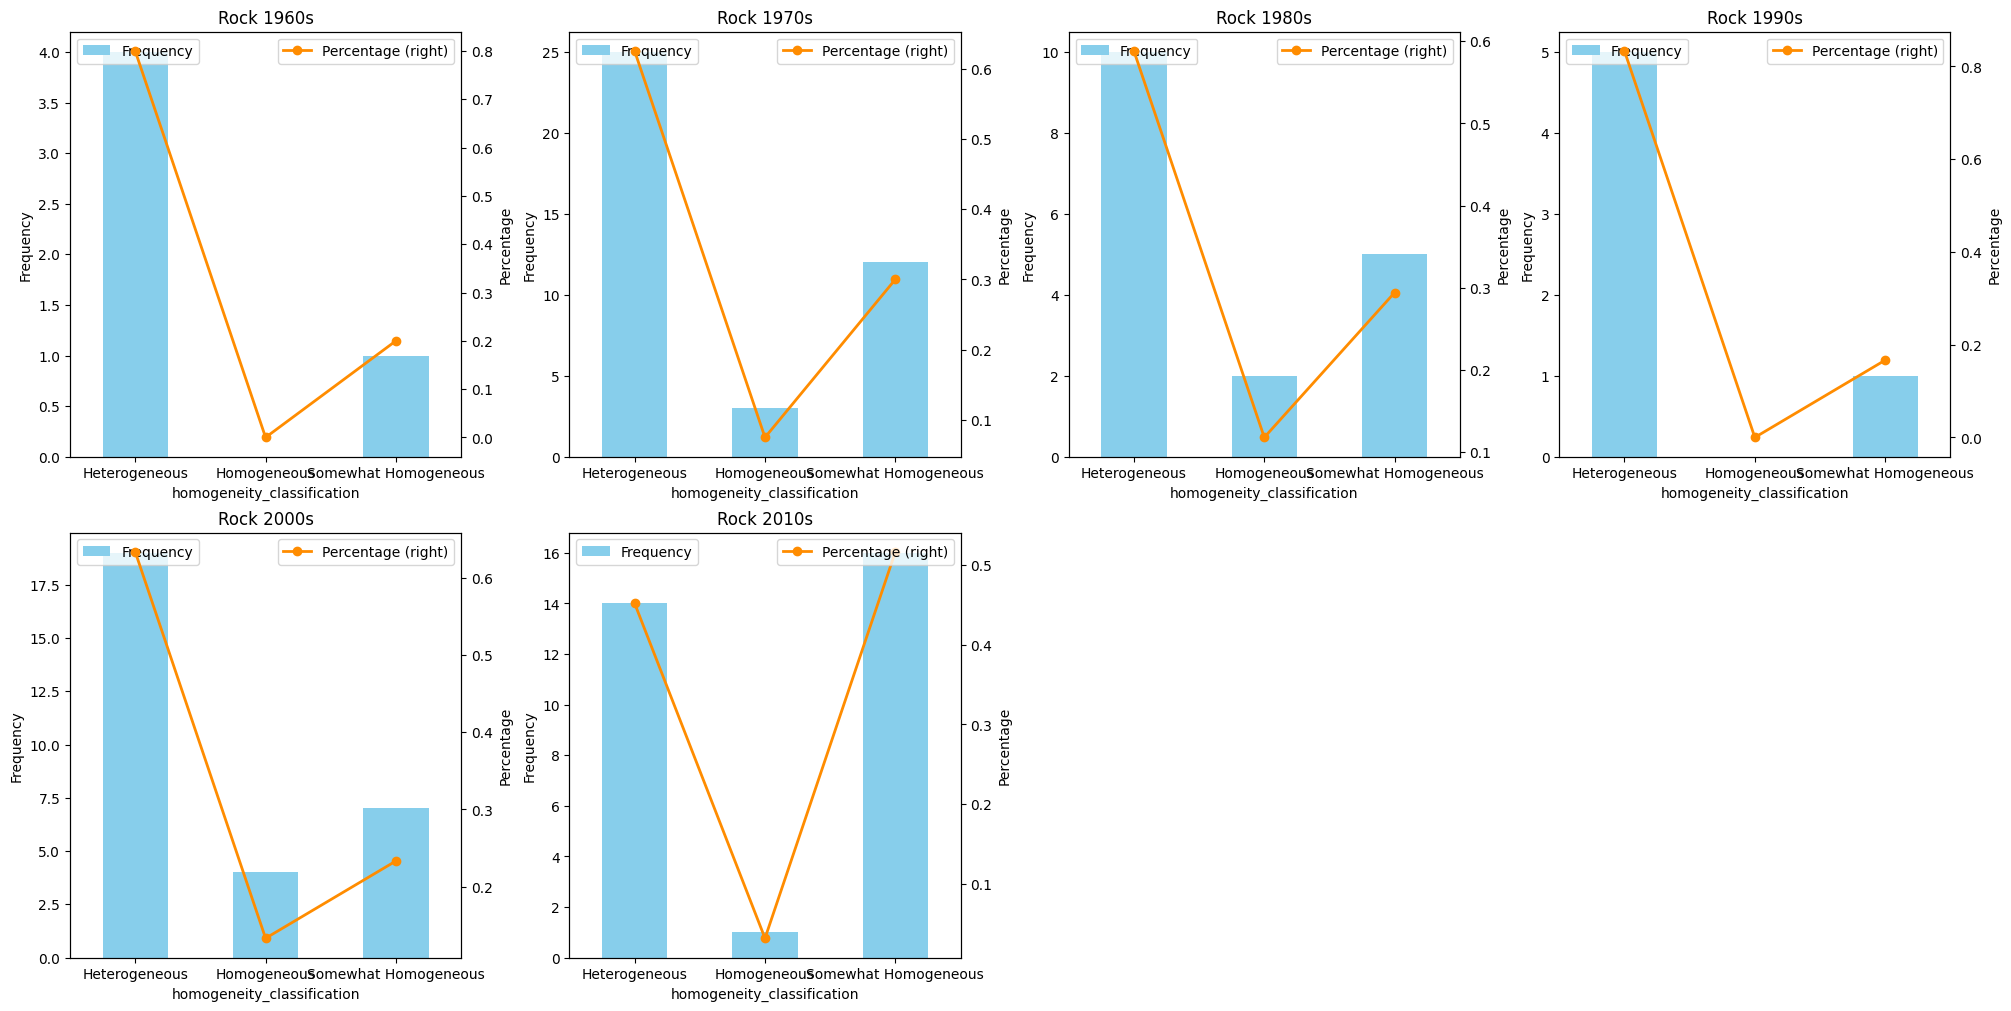

--------------   Pop   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                  50    0.588235
Somewhat Homogeneous           28    0.329412
Homogeneous                     7    0.082353


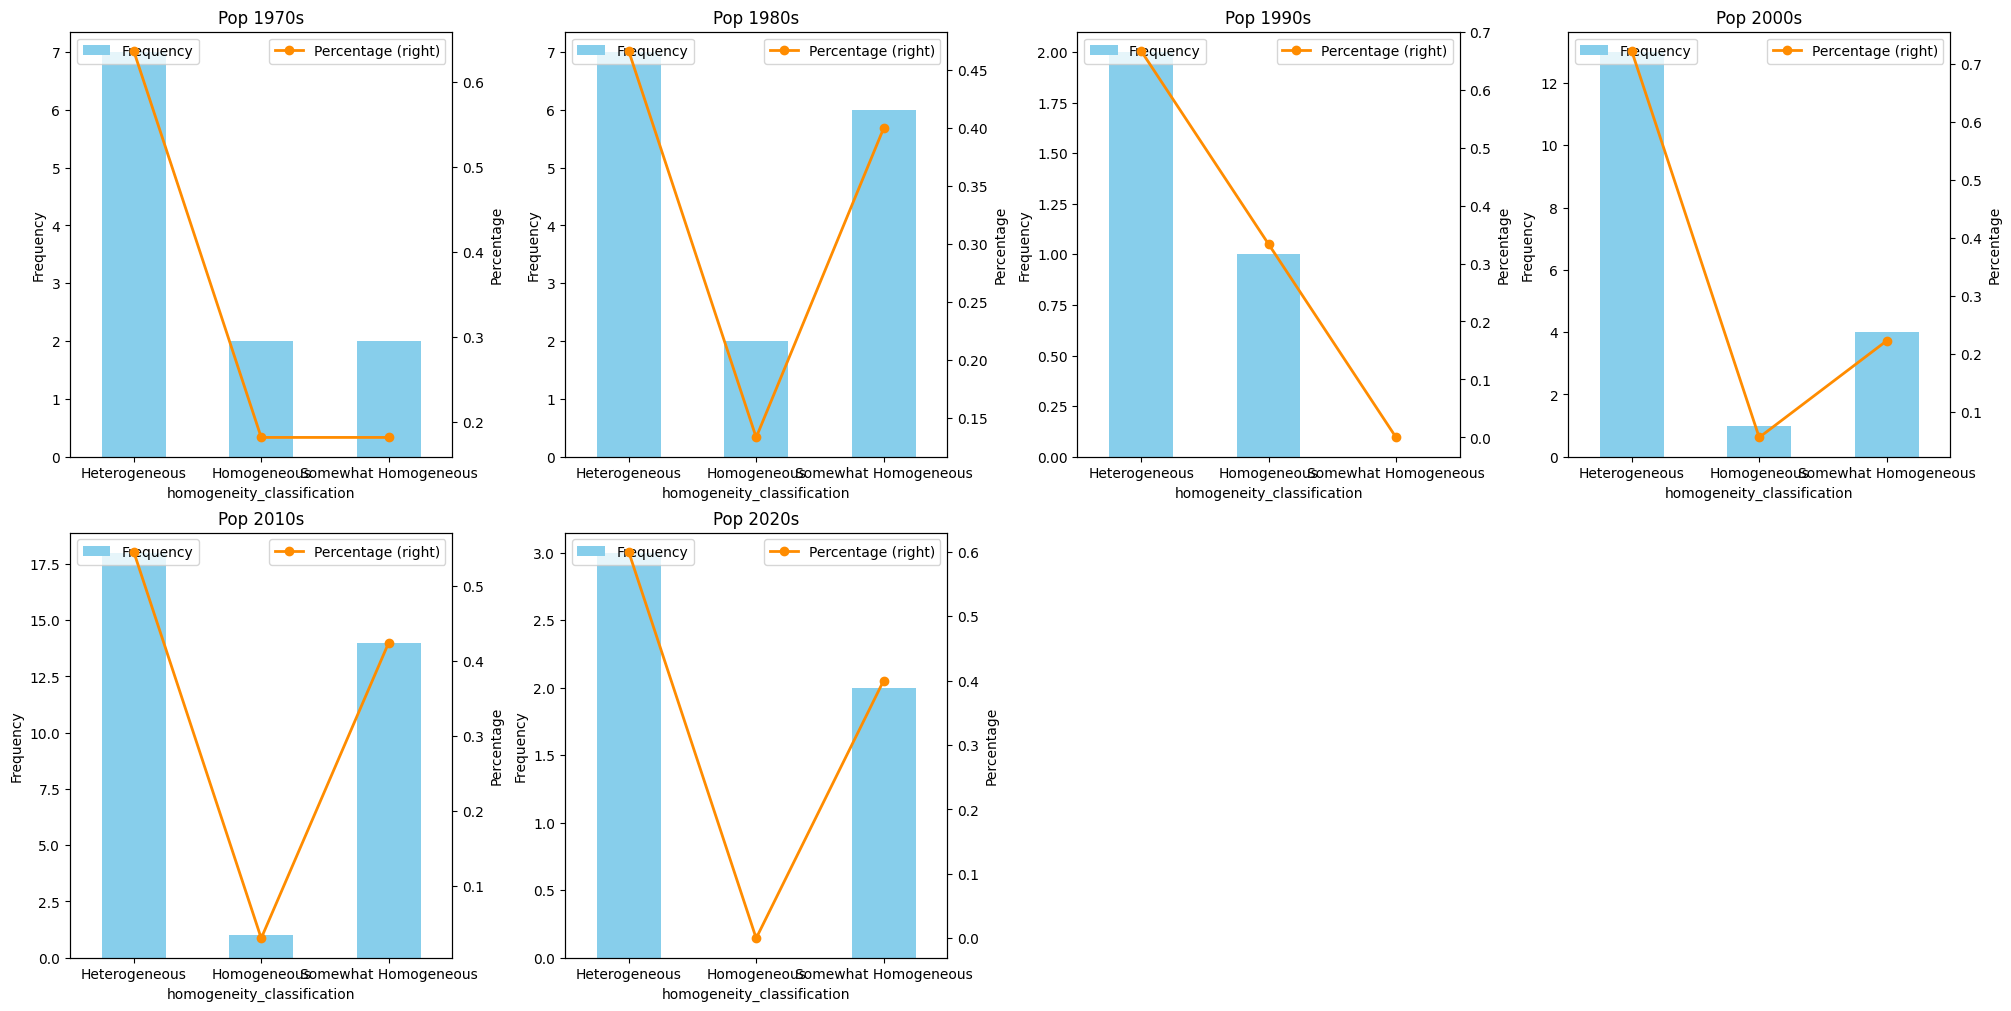

--------------   Electronic   -------------- 
                            Count  Percentage
homogeneity_classification                   
Somewhat Homogeneous            6    0.461538
Heterogeneous                   5    0.384615
Homogeneous                     2    0.153846


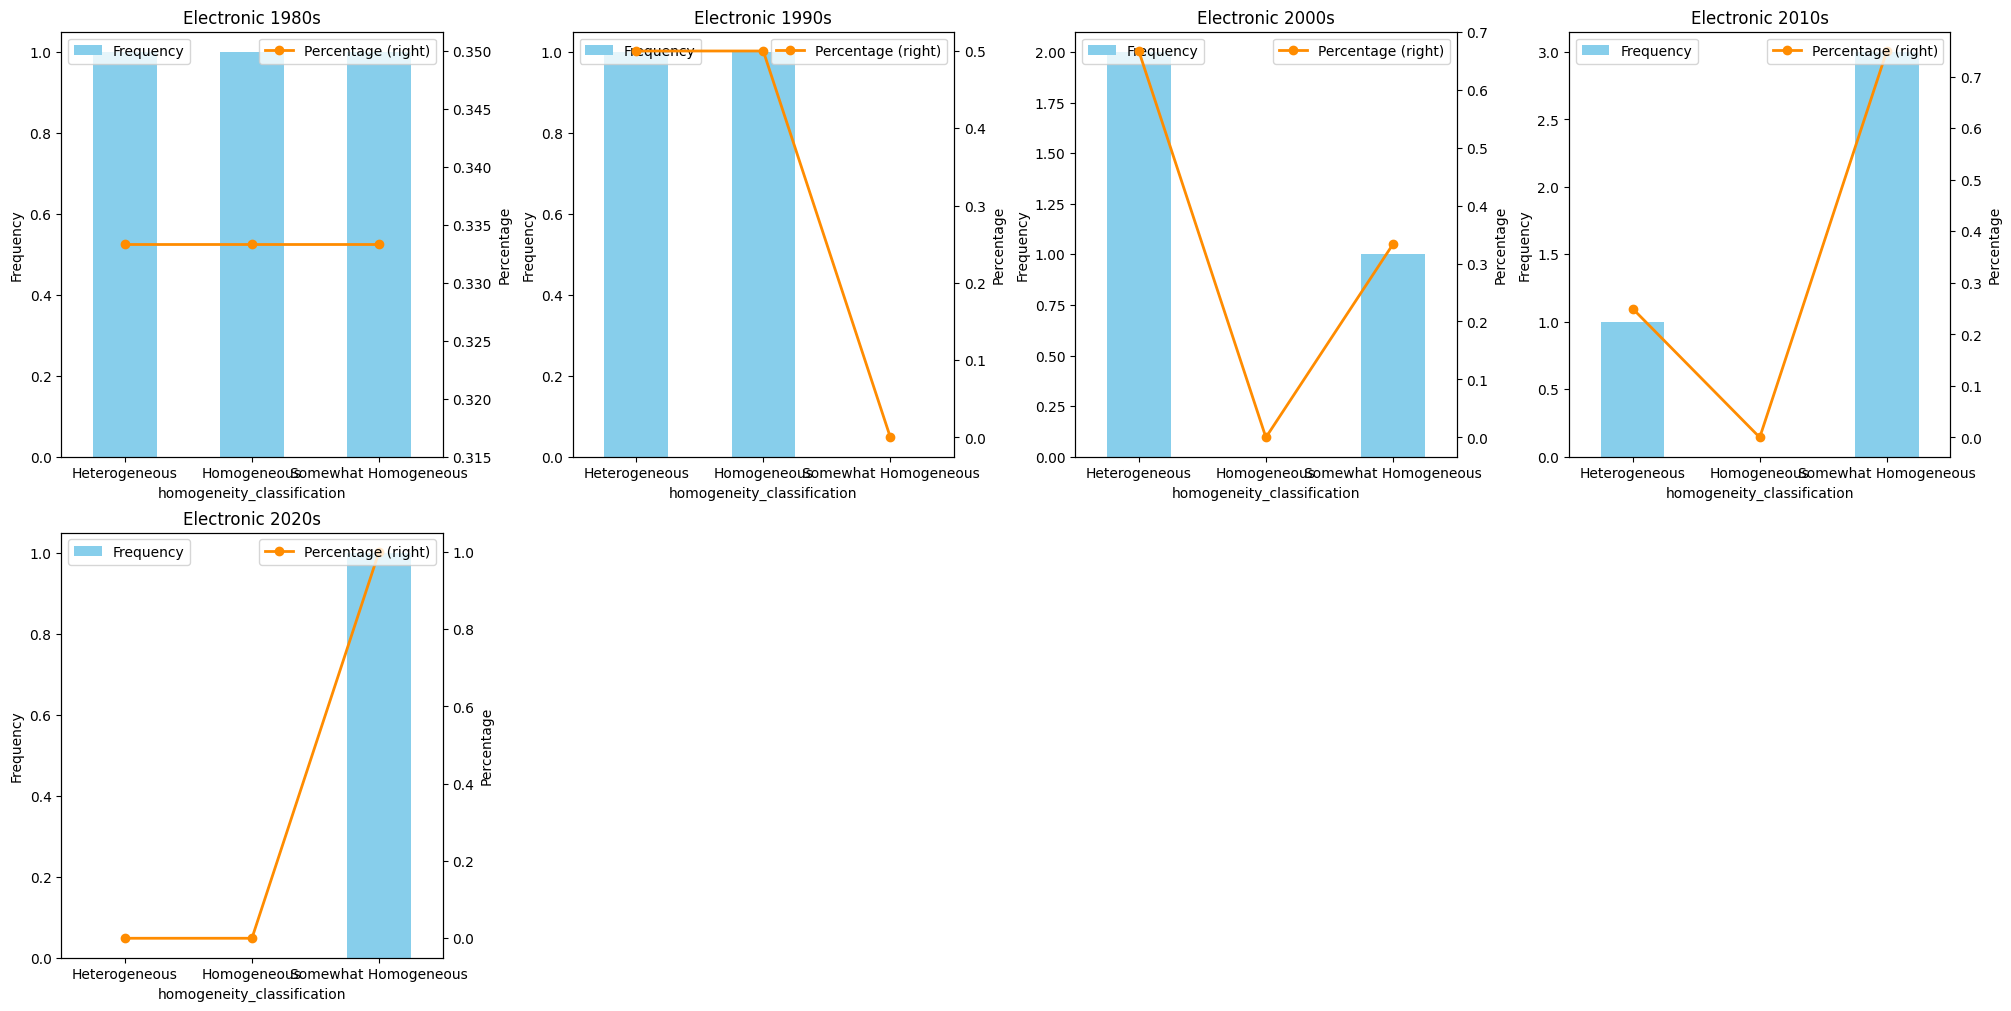

--------------   Soul   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                   8    0.615385
Somewhat Homogeneous            5    0.384615


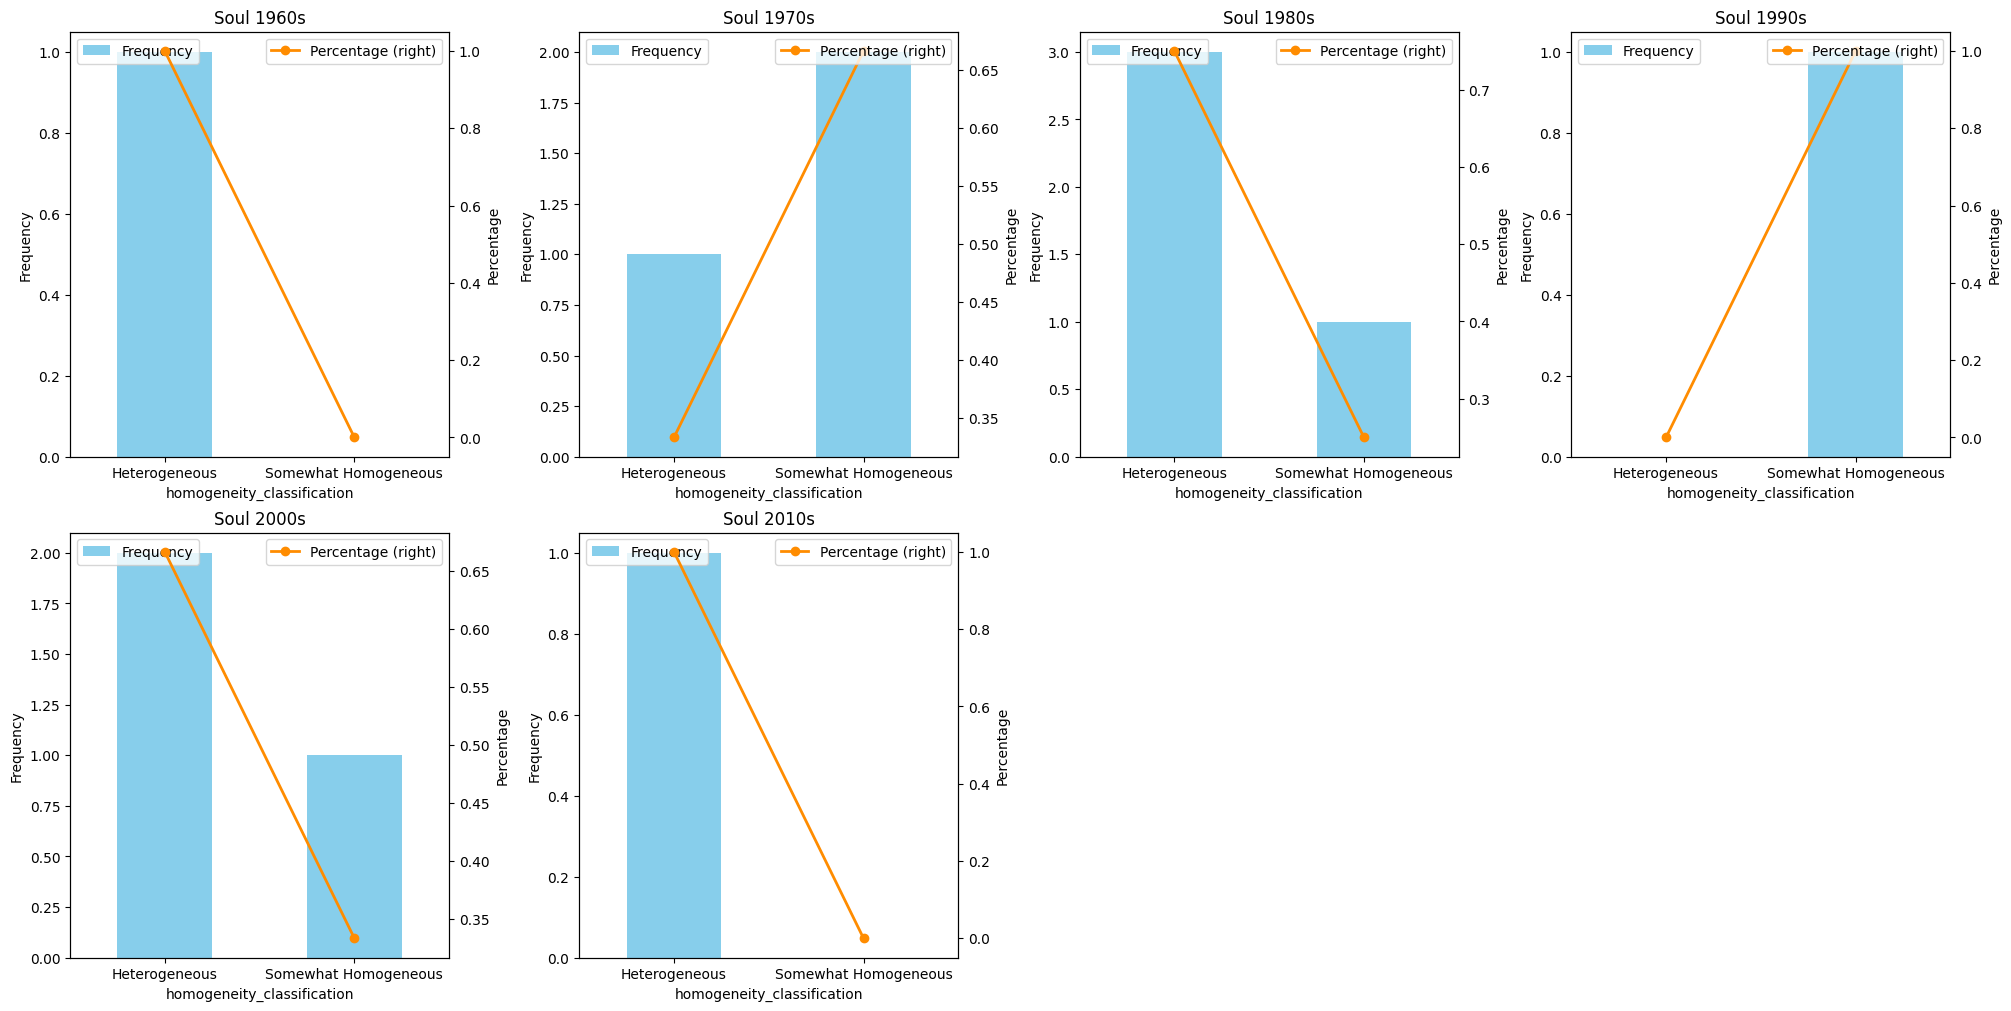

--------------   Funk   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                   6        0.75
Somewhat Homogeneous            2        0.25


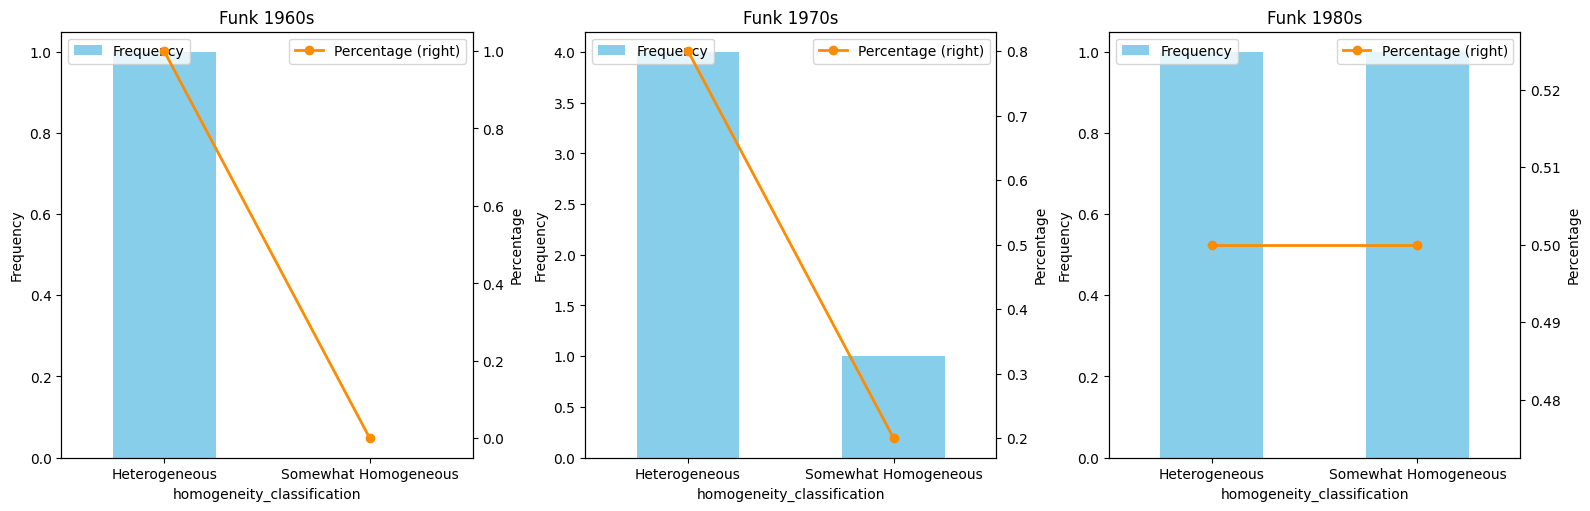

 ***************** Germany ******************+
--------------   Show Tunes   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                  83    0.761468
Somewhat Homogeneous           25    0.229358
Homogeneous                     1    0.009174


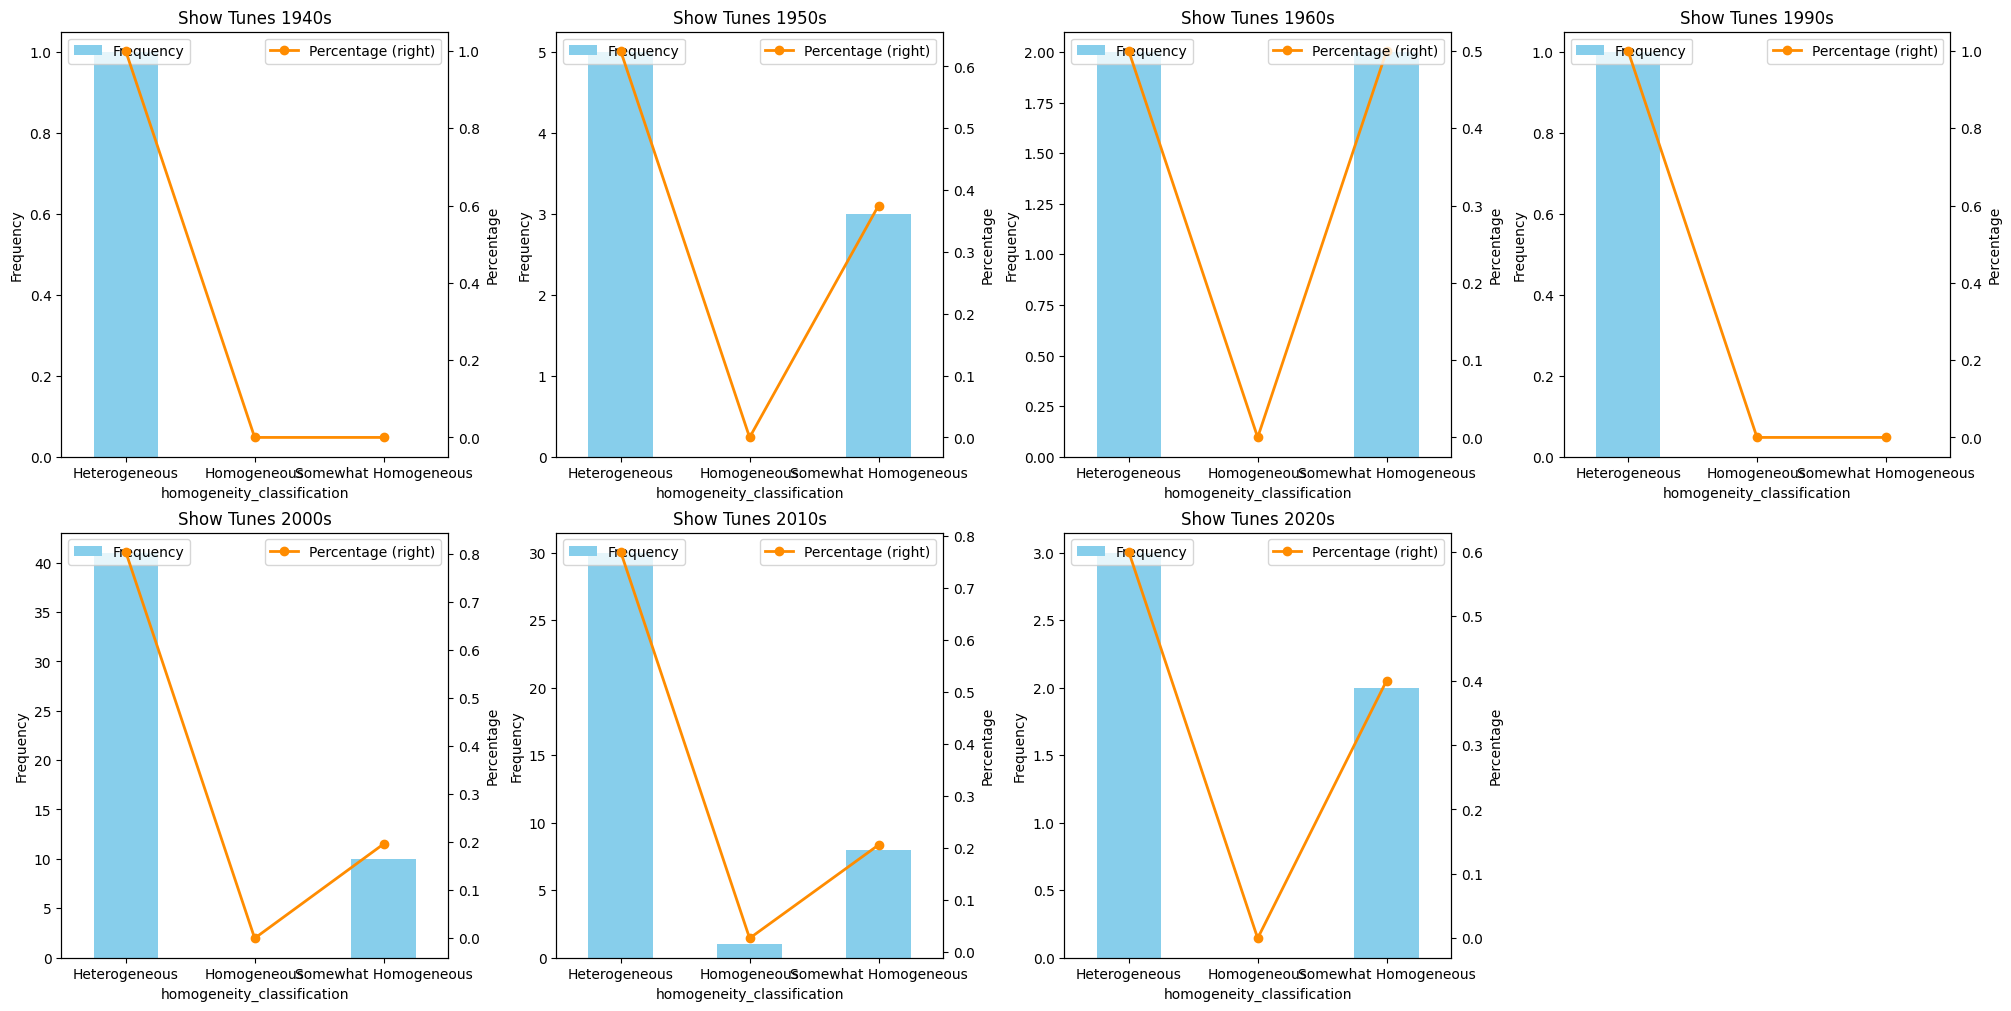

--------------   Electronic   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                  11    0.611111
Somewhat Homogeneous            7    0.388889


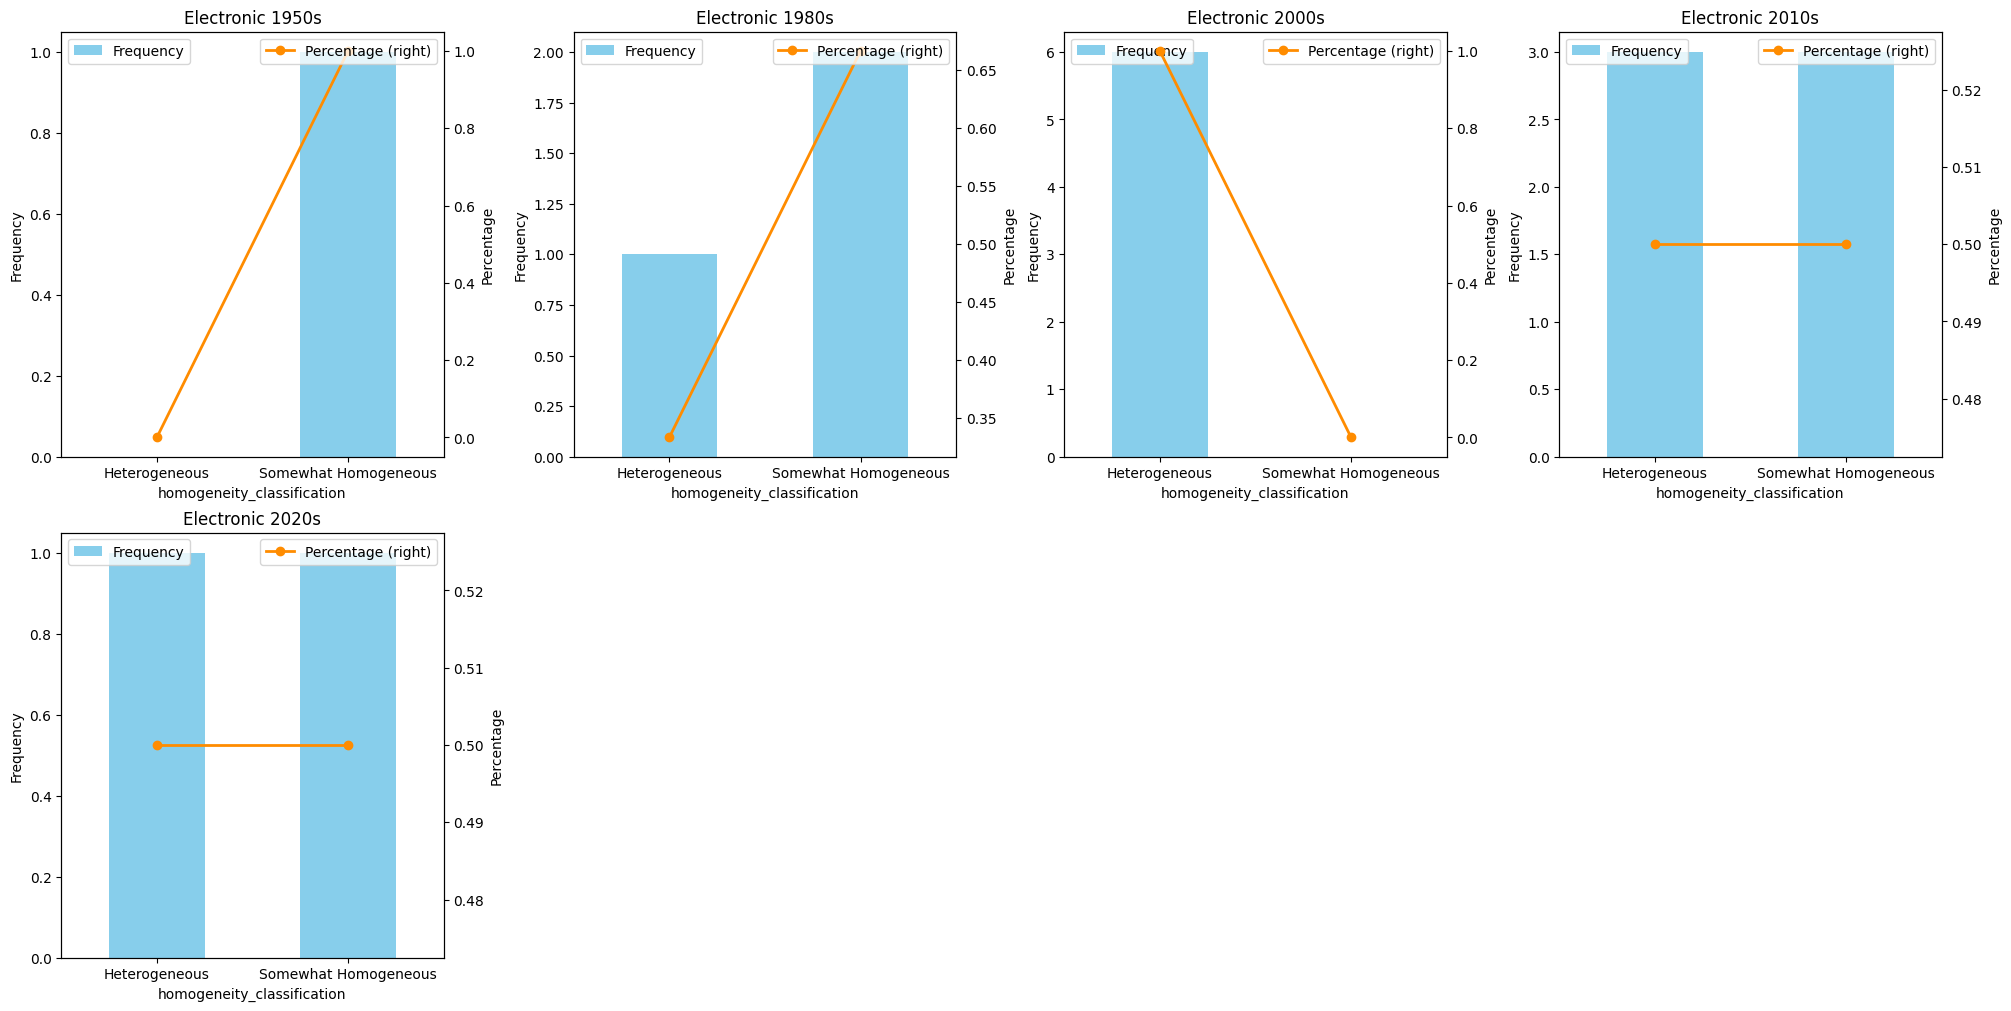

--------------   Hip Hop   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                  10    0.666667
Somewhat Homogeneous            4    0.266667
Homogeneous                     1    0.066667


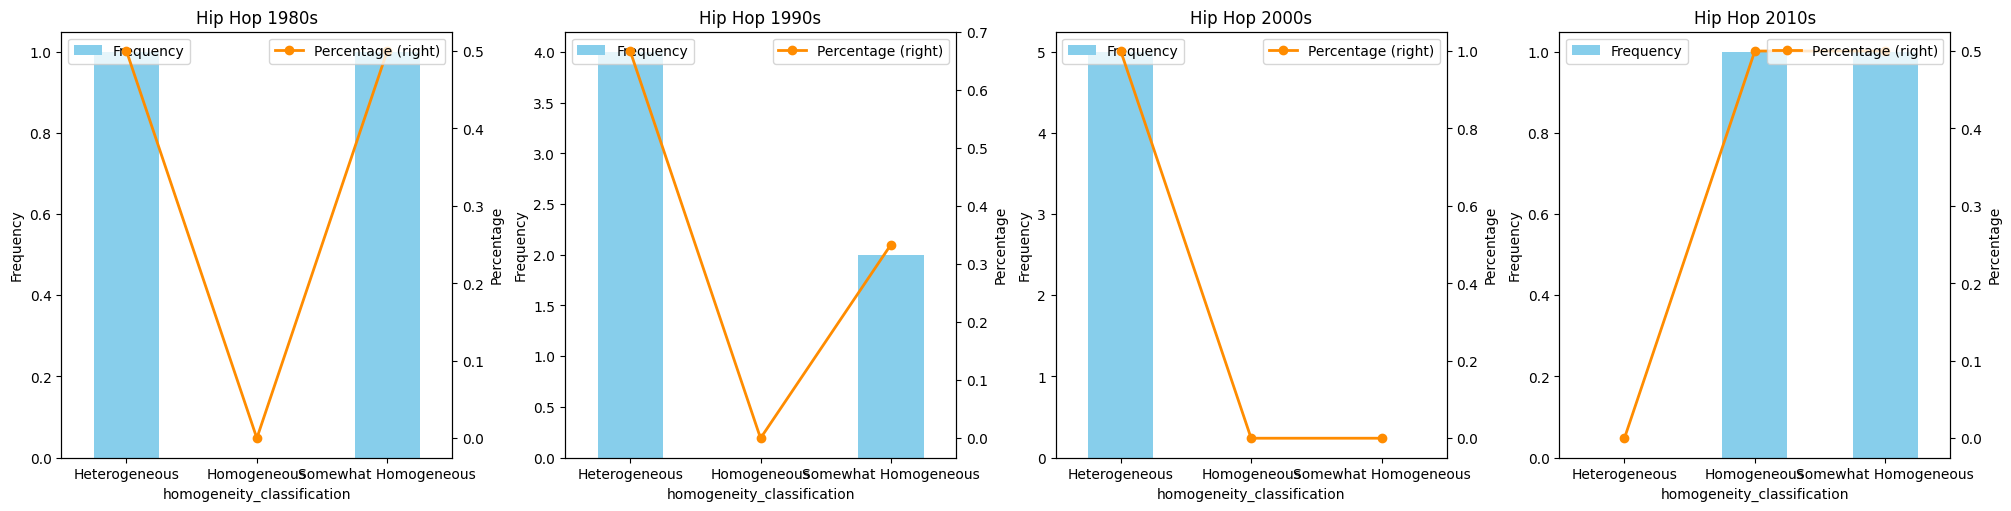

--------------   Rock   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                   8    0.571429
Somewhat Homogeneous            6    0.428571


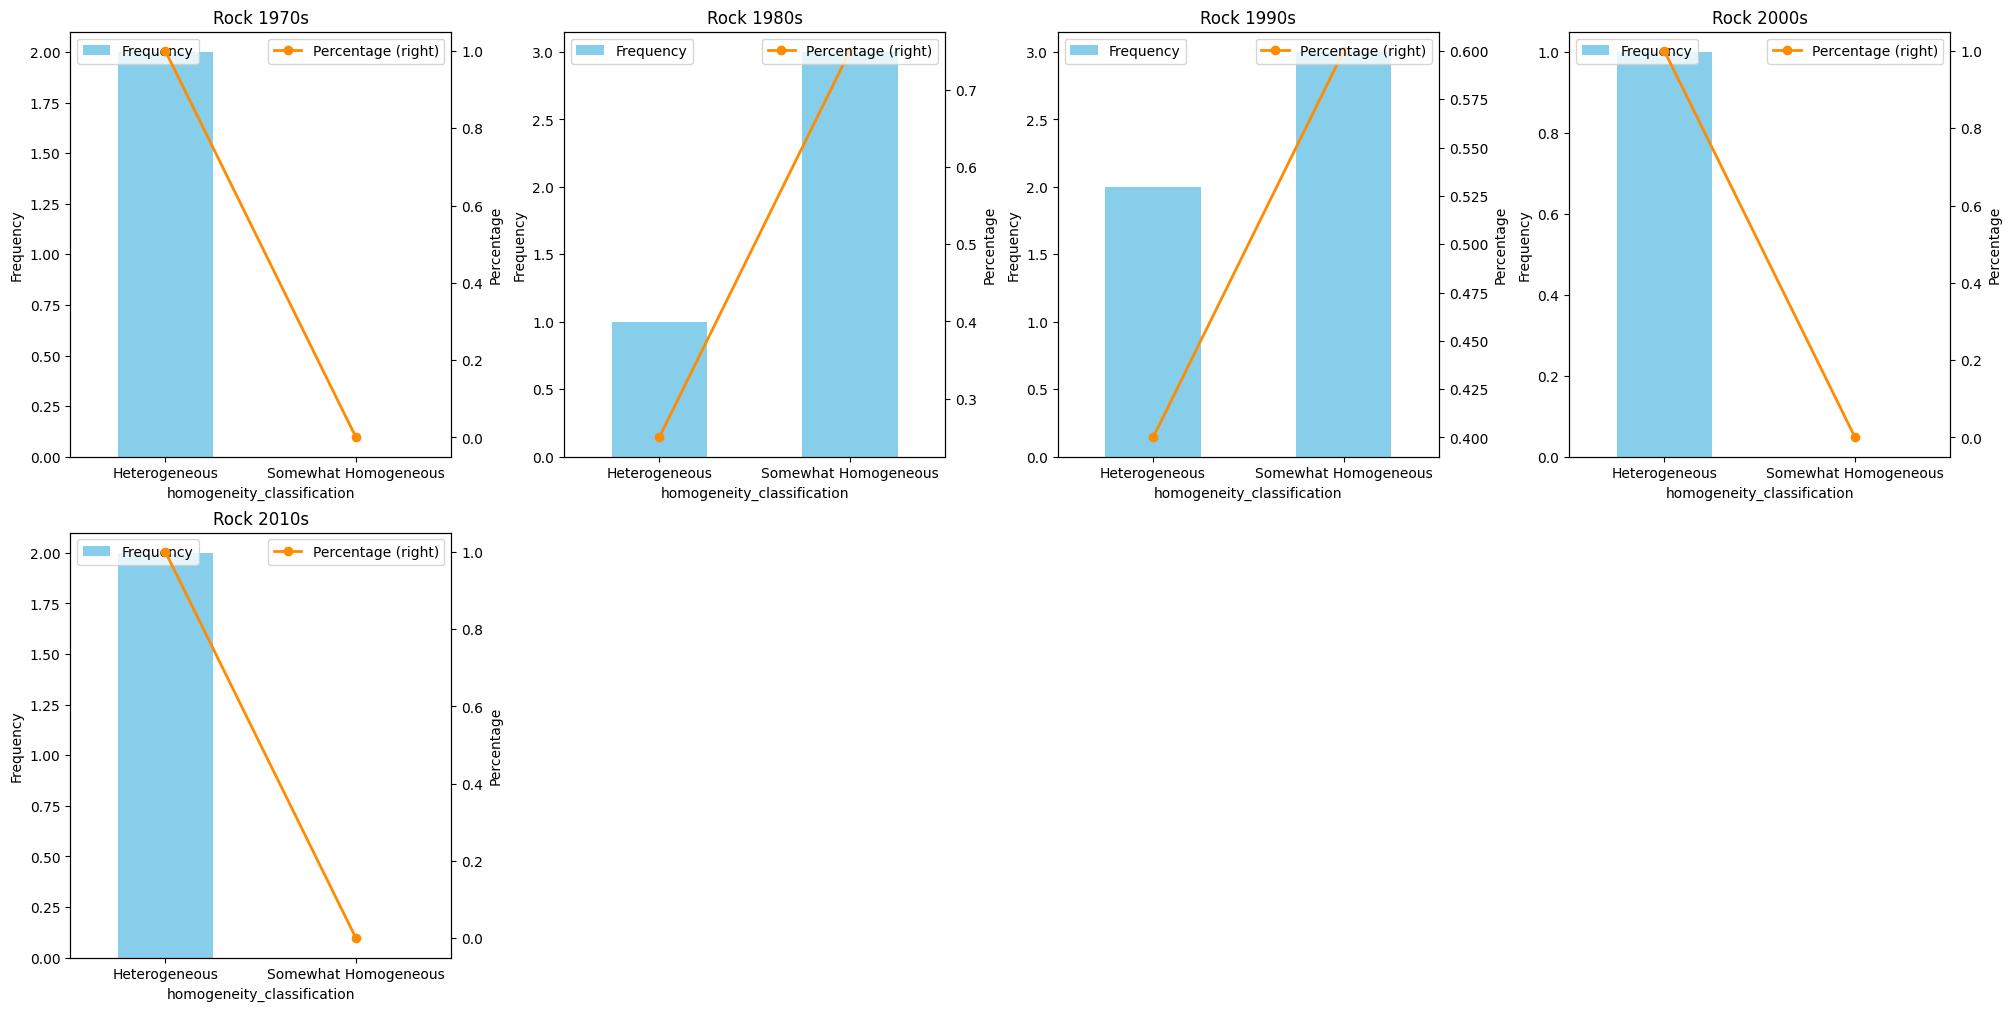

--------------   Pop   -------------- 
                            Count  Percentage
homogeneity_classification                   
Somewhat Homogeneous            7    0.538462
Heterogeneous                   6    0.461538


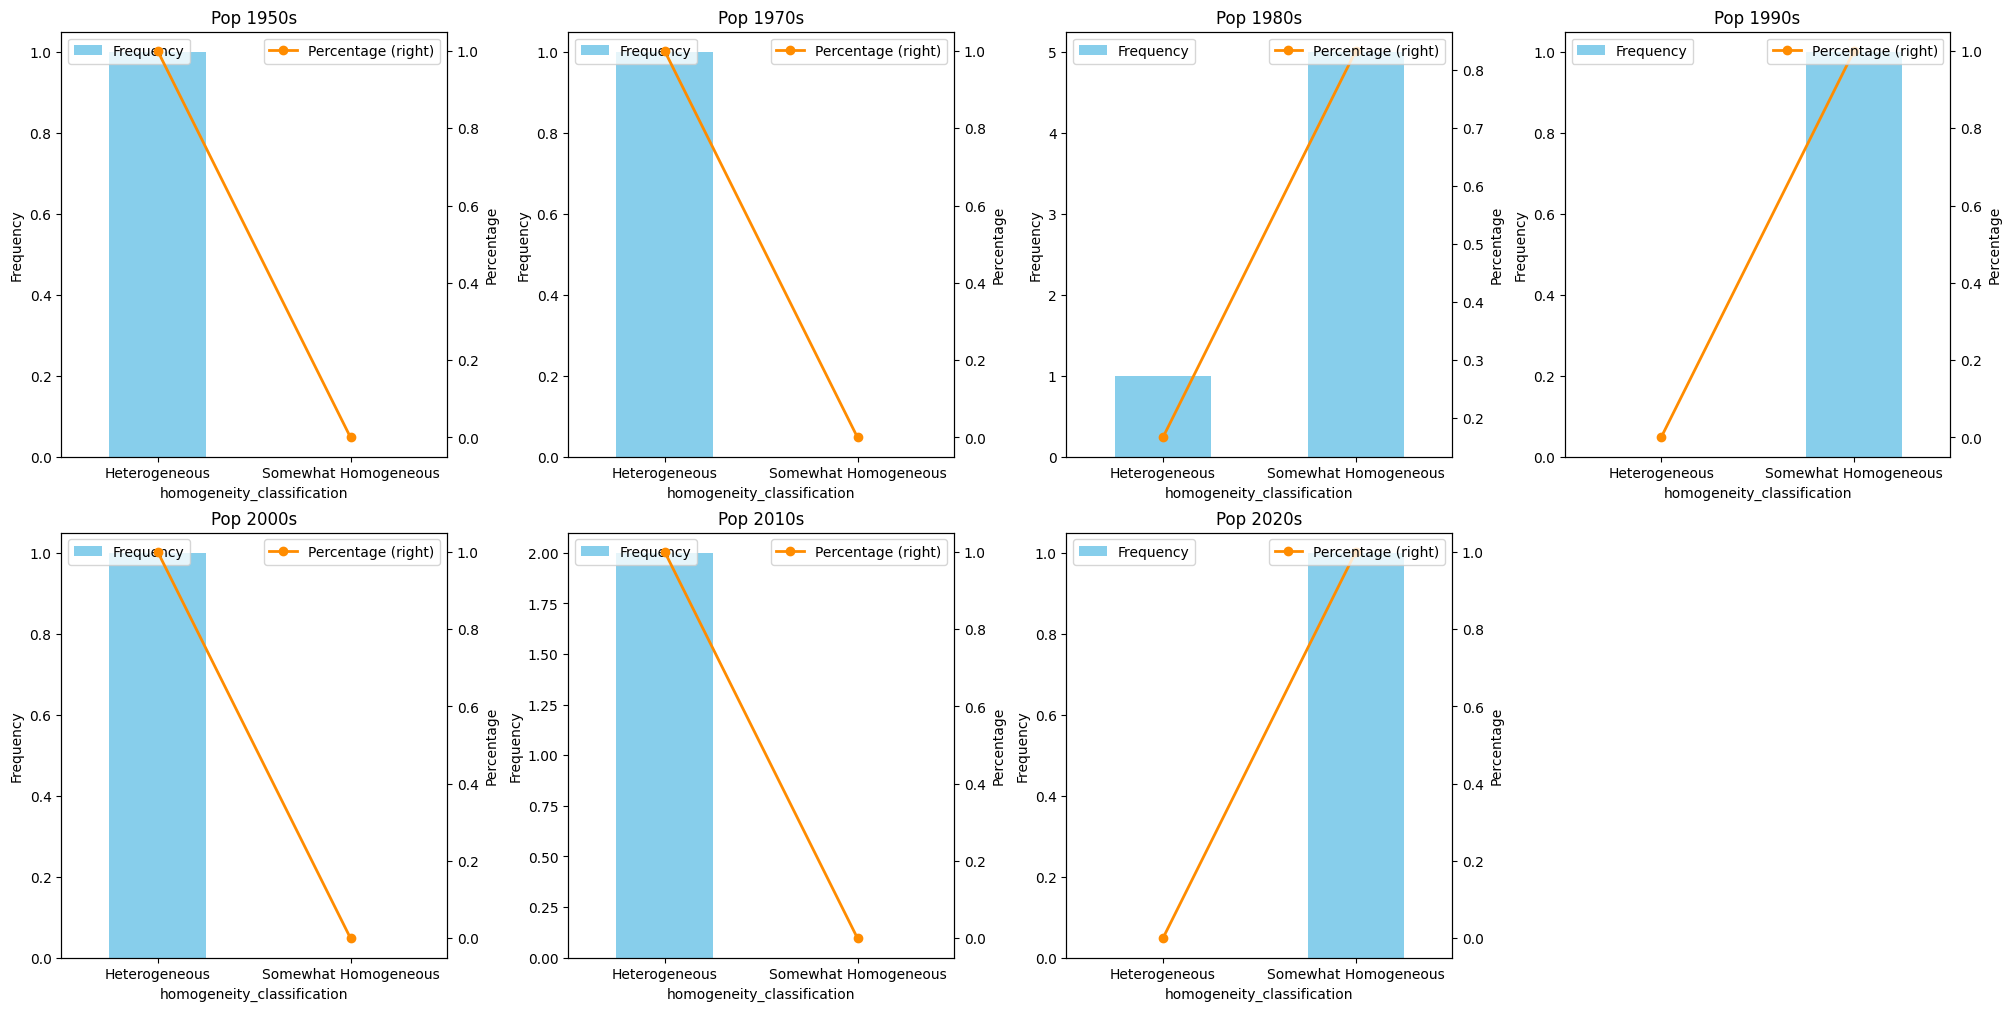

 ***************** Canada ******************+
--------------   Rock   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                  22    0.628571
Somewhat Homogeneous           13    0.371429


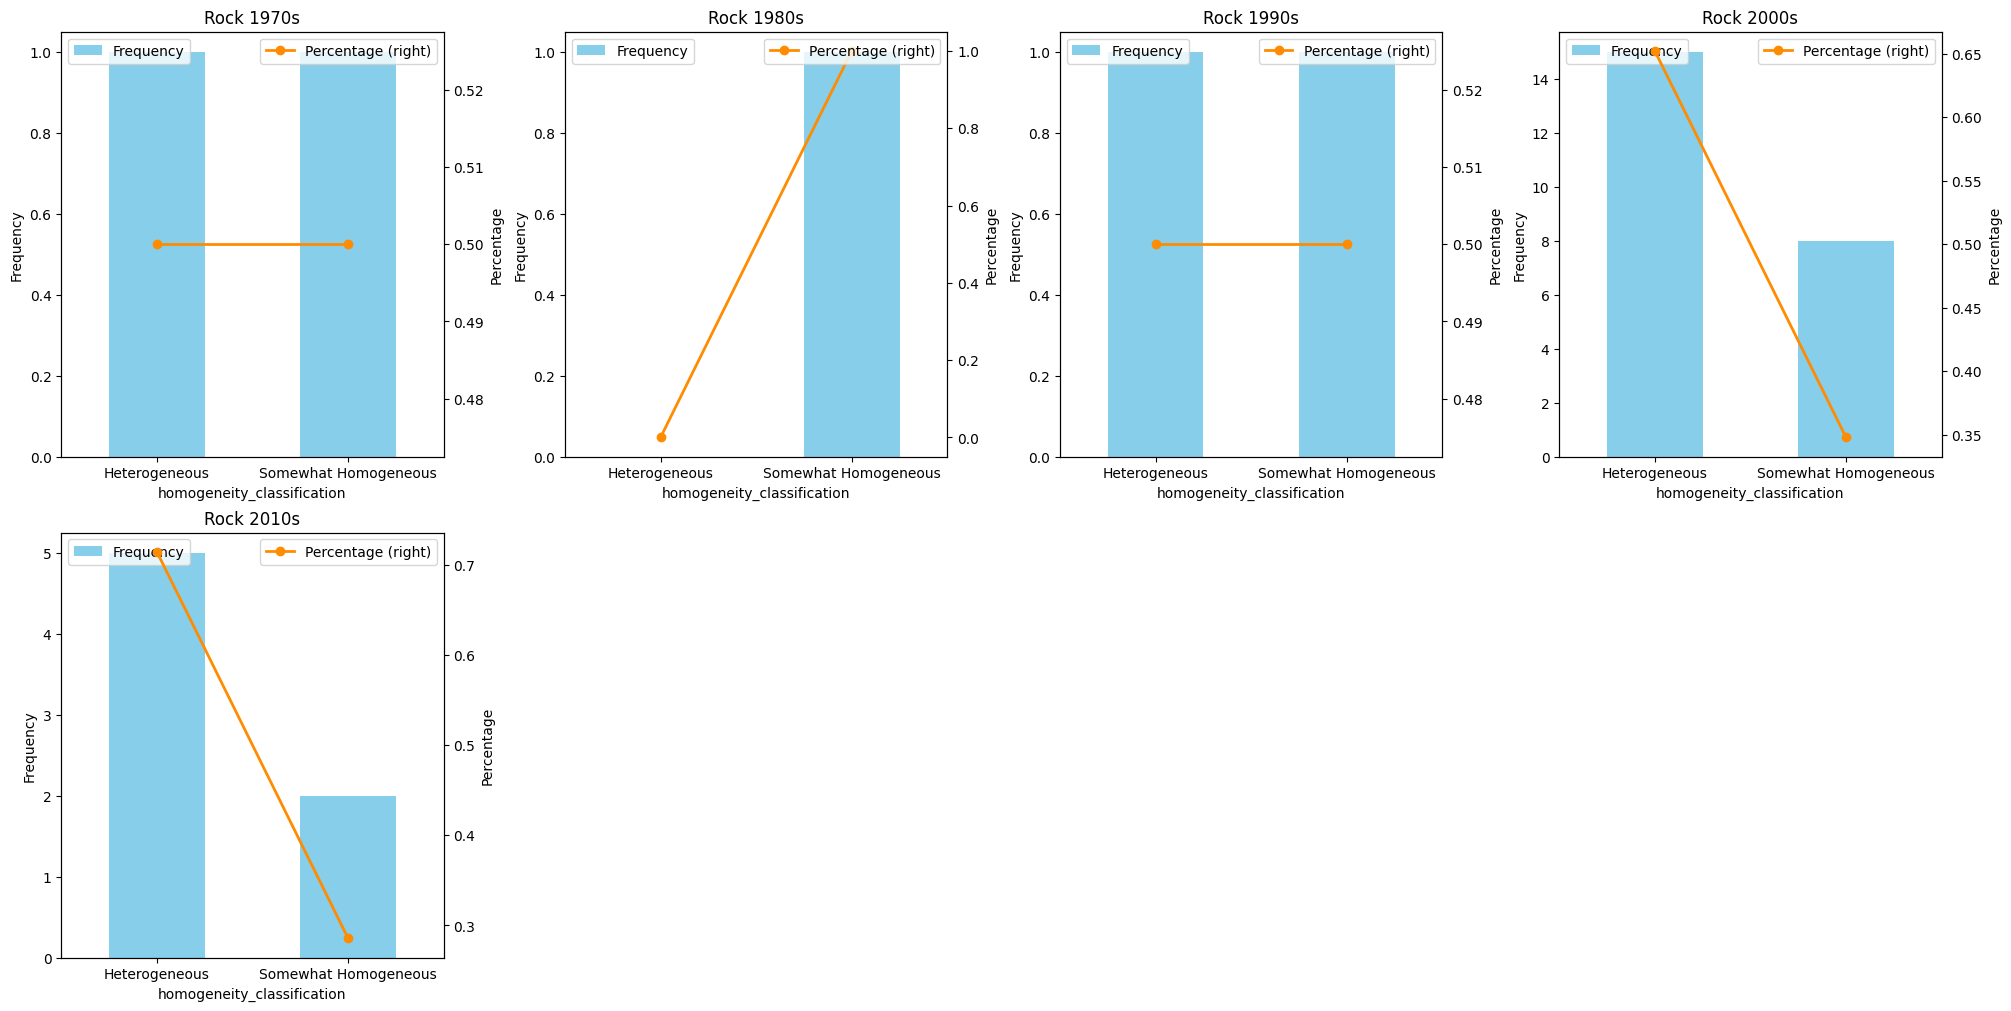

--------------   Pop   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                  19    0.575758
Somewhat Homogeneous           13    0.393939
Homogeneous                     1    0.030303


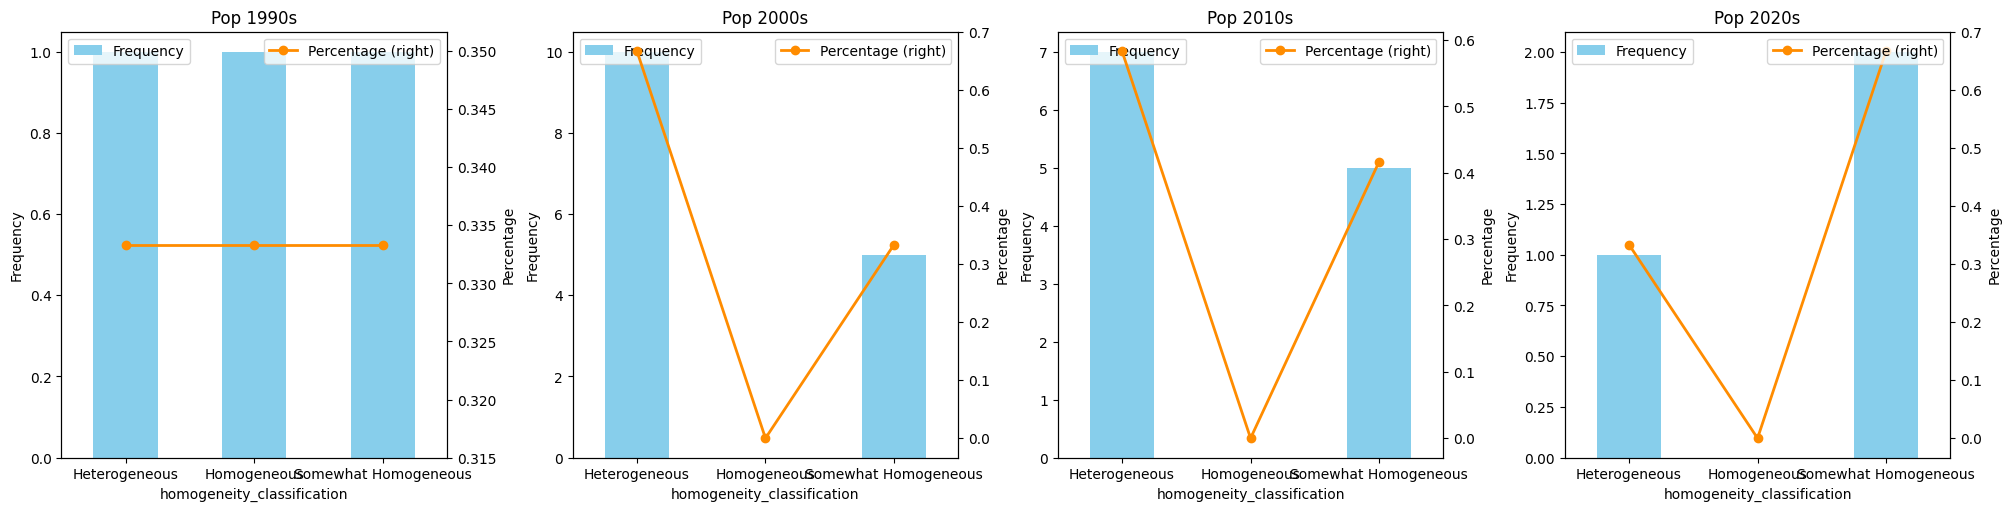

--------------   RnB   -------------- 
                            Count  Percentage
homogeneity_classification                   
Somewhat Homogeneous            7    0.583333
Heterogeneous                   4    0.333333
Homogeneous                     1    0.083333


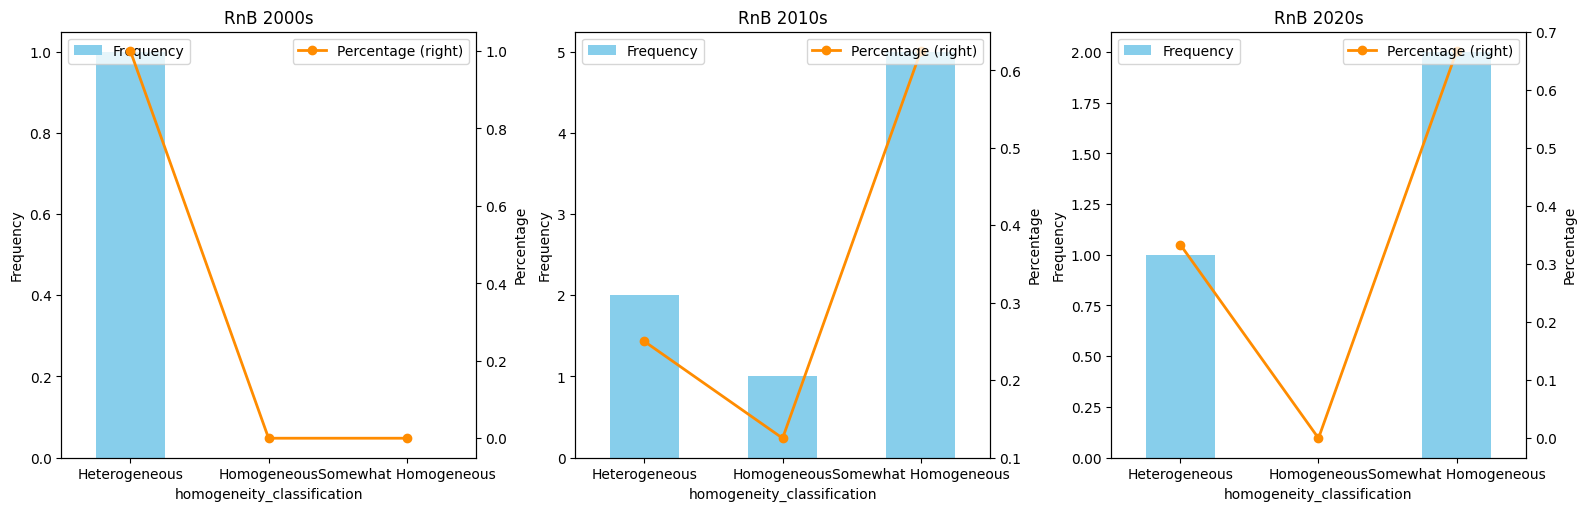

--------------   Hip Hop   -------------- 
                            Count  Percentage
homogeneity_classification                   
Somewhat Homogeneous            9    0.750000
Heterogeneous                   2    0.166667
Homogeneous                     1    0.083333


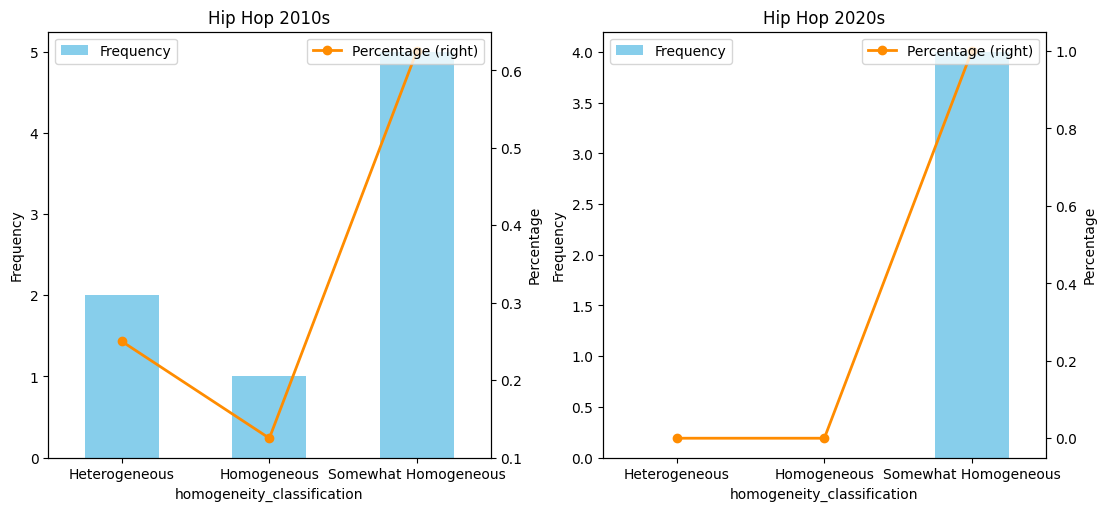

--------------   Jazz   -------------- 
                            Count  Percentage
homogeneity_classification                   
Somewhat Homogeneous            5    0.454545
Heterogeneous                   5    0.454545
Homogeneous                     1    0.090909


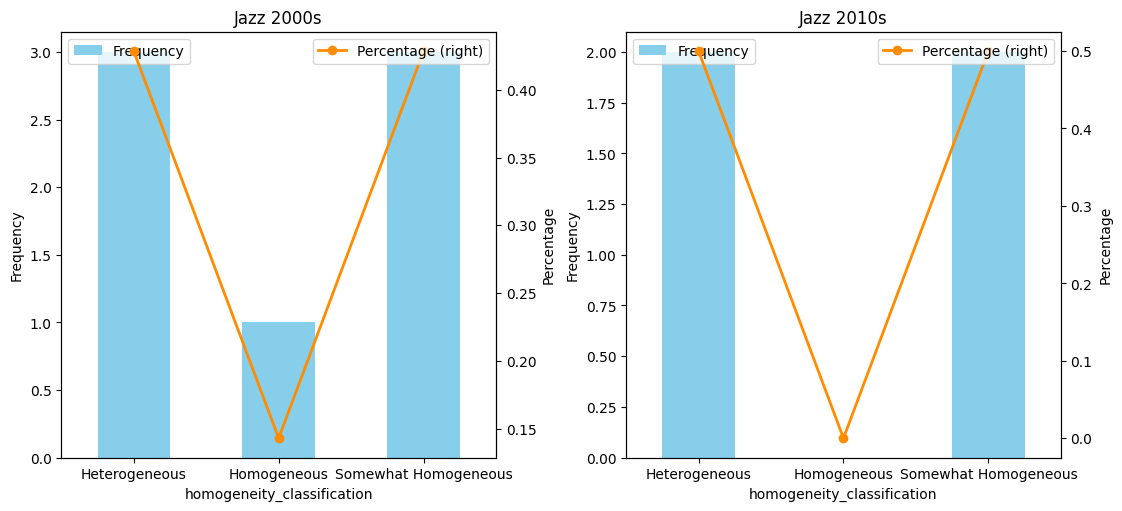

 ***************** Australia ******************+
--------------   Pop   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                   8    0.533333
Somewhat Homogeneous            7    0.466667


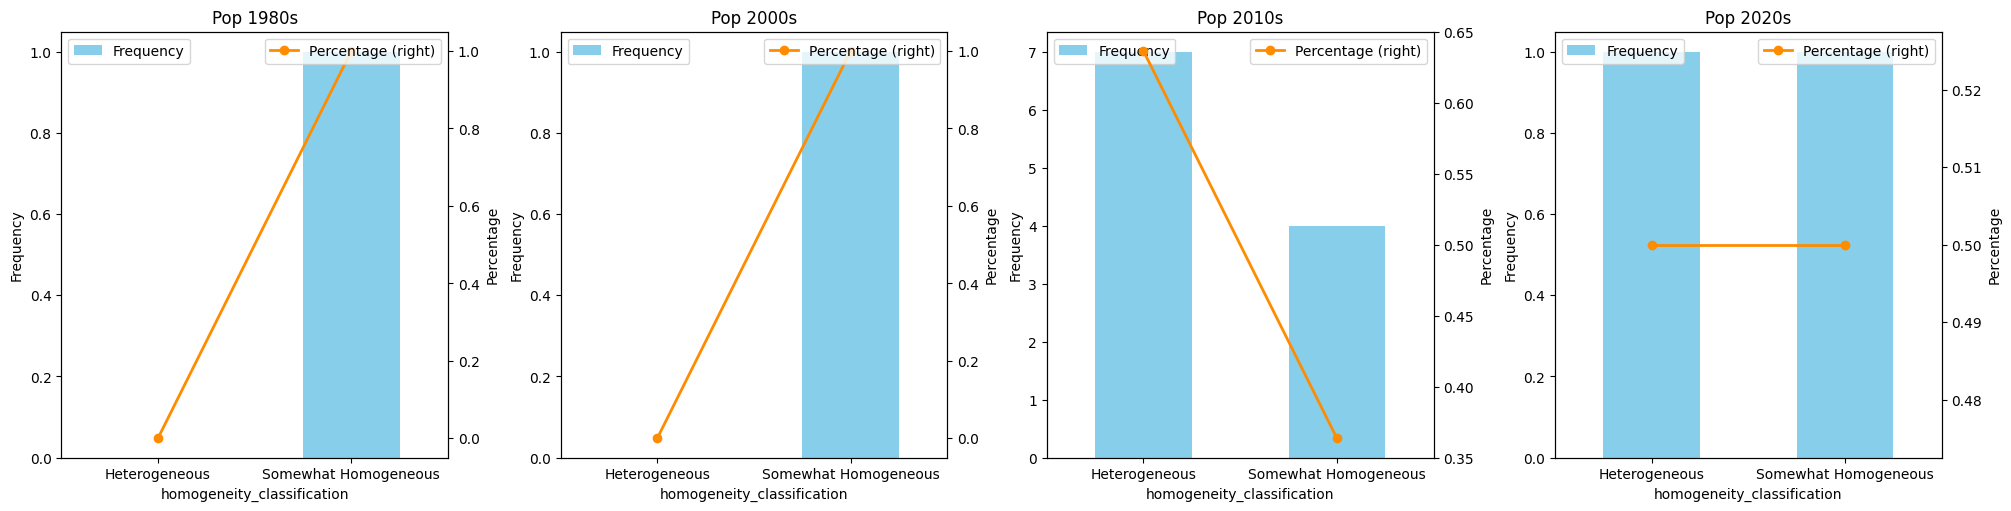

--------------   Rock   -------------- 
                            Count  Percentage
homogeneity_classification                   
Somewhat Homogeneous            6    0.461538
Heterogeneous                   6    0.461538
Homogeneous                     1    0.076923


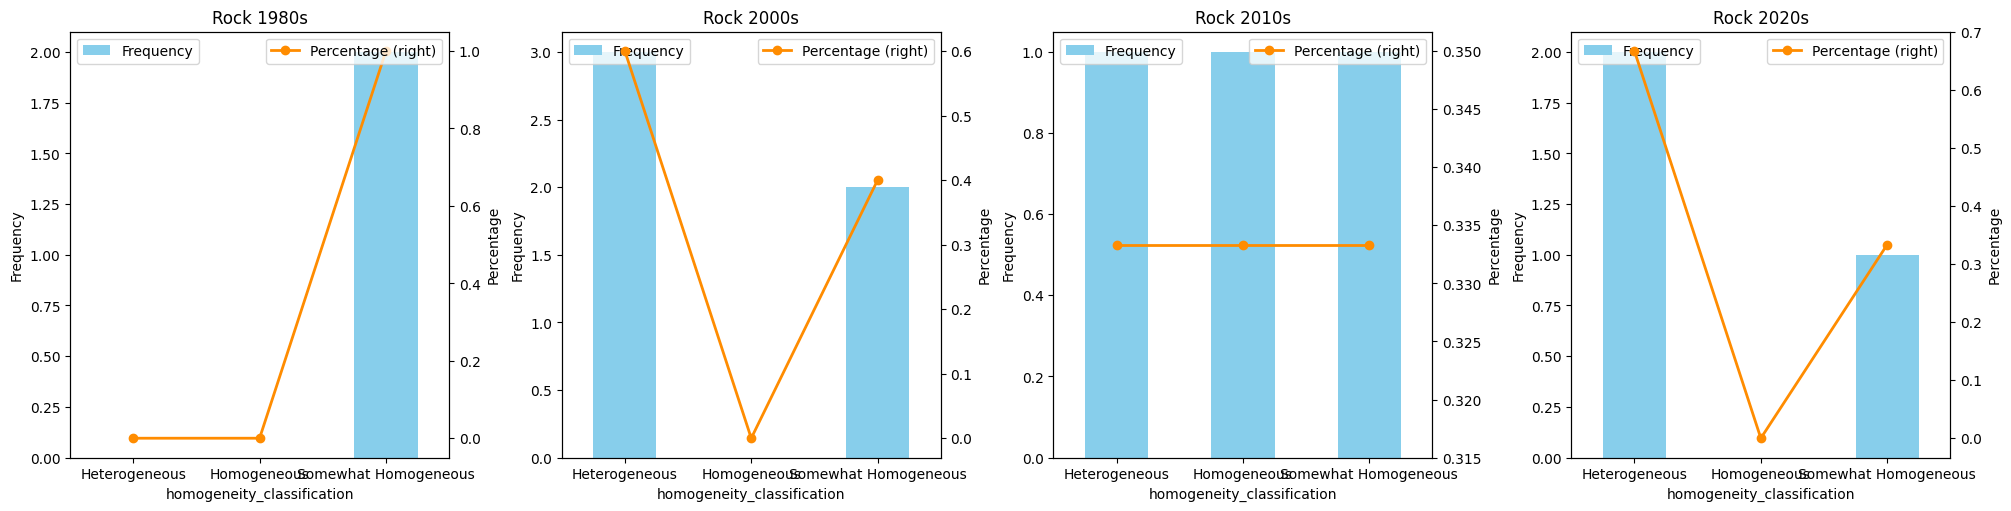

--------------   Country   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                   9    0.818182
Somewhat Homogeneous            2    0.181818


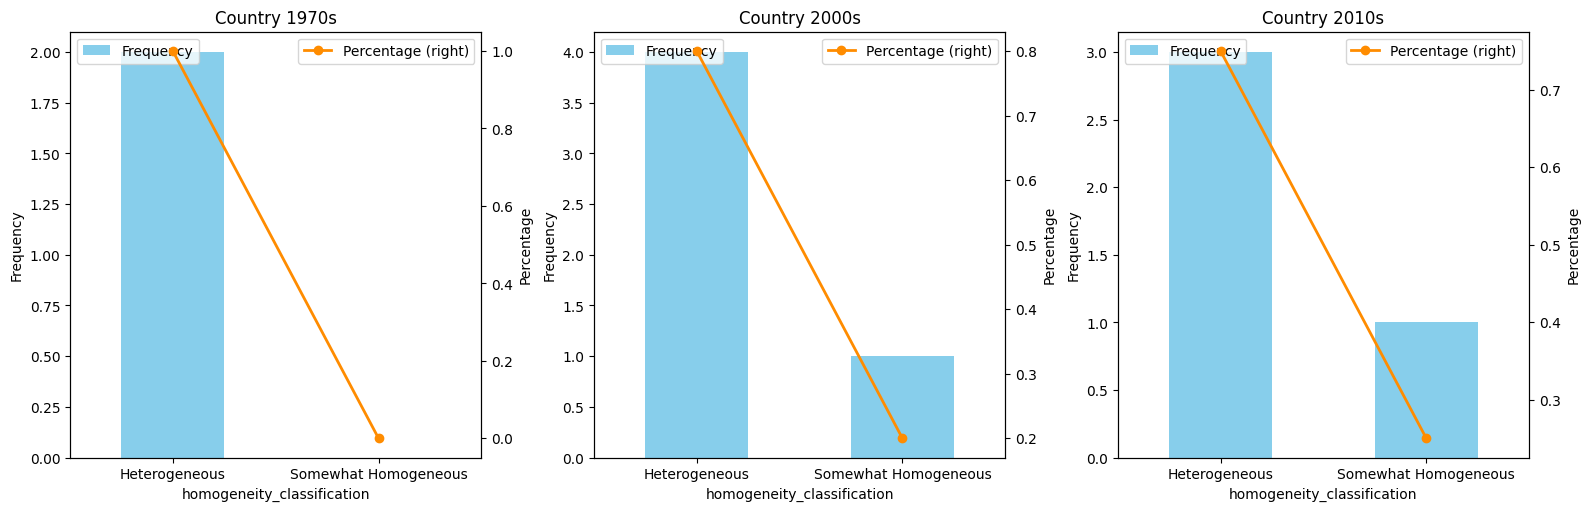

--------------   Electronic   -------------- 
                            Count  Percentage
homogeneity_classification                   
Somewhat Homogeneous            2         1.0


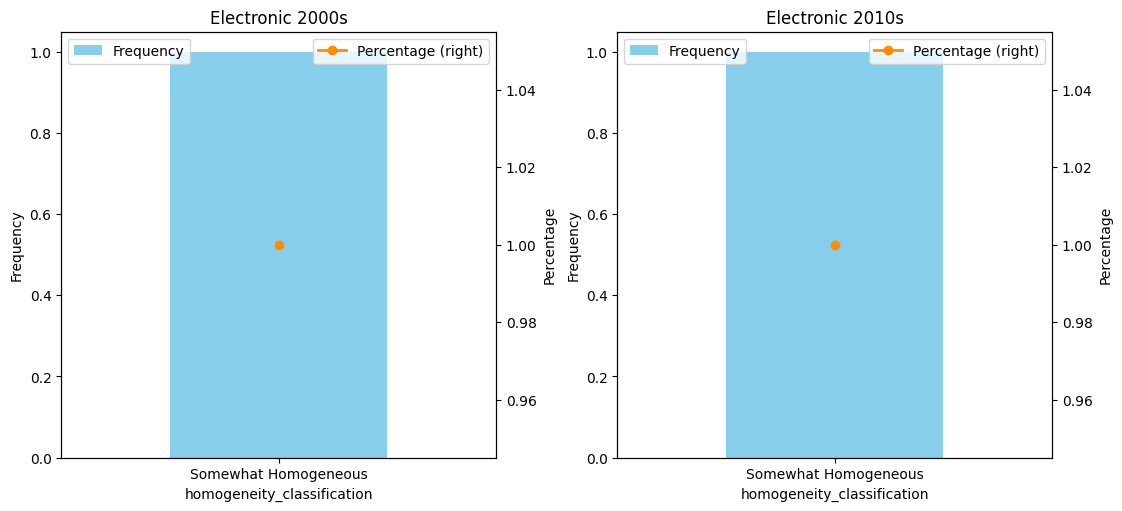

--------------   Hip Hop   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                   1         1.0


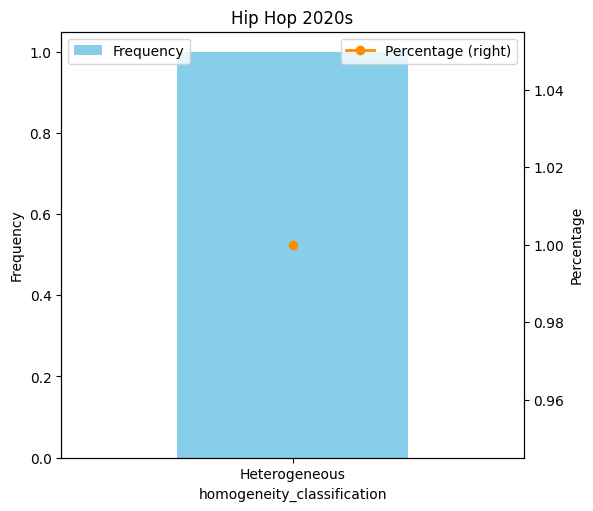

 ***************** Ireland ******************+
--------------   Rock   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                  10    0.714286
Somewhat Homogeneous            3    0.214286
Homogeneous                     1    0.071429


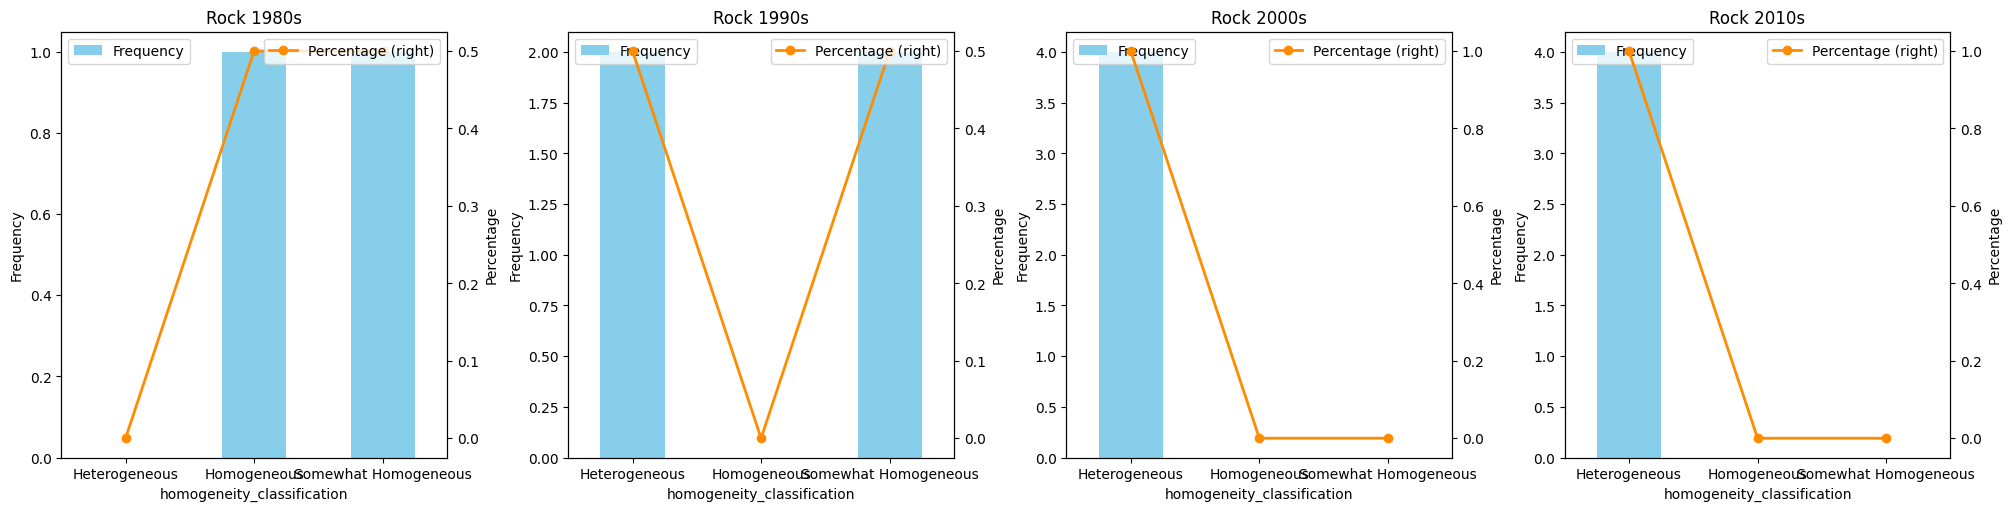

--------------   World Music   -------------- 
                            Count  Percentage
homogeneity_classification                   
Heterogeneous                   7       0.875
Somewhat Homogeneous            1       0.125


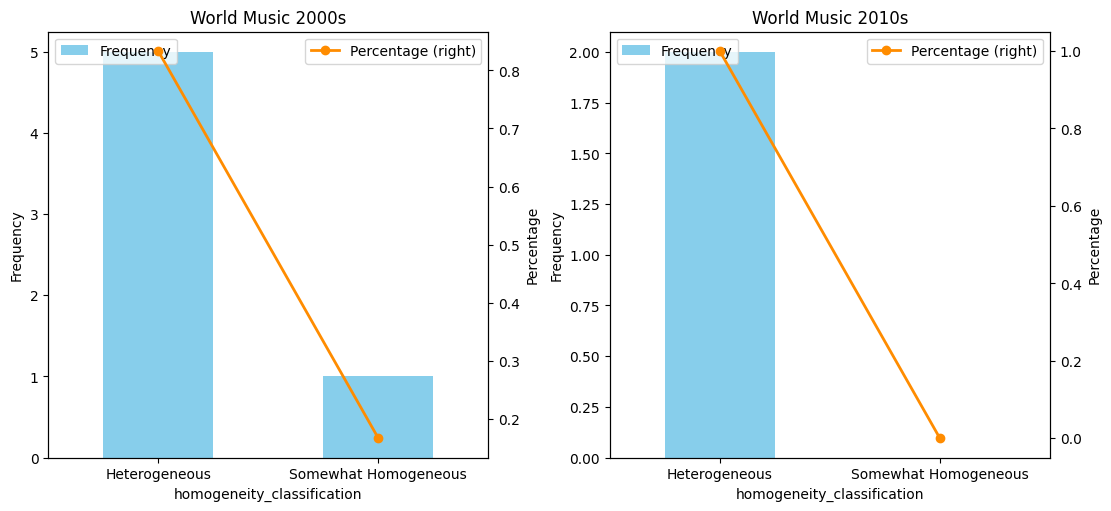

--------------   Pop   -------------- 
                            Count  Percentage
homogeneity_classification                   
Somewhat Homogeneous            1         0.5
Heterogeneous                   1         0.5


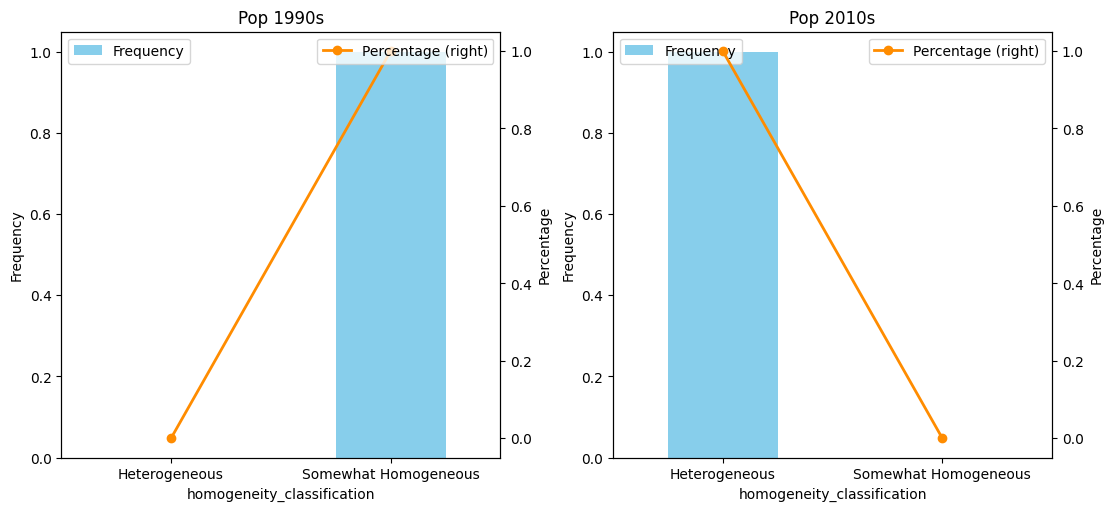

--------------   Electronic   -------------- 
                            Count  Percentage
homogeneity_classification                   
Somewhat Homogeneous            1         1.0


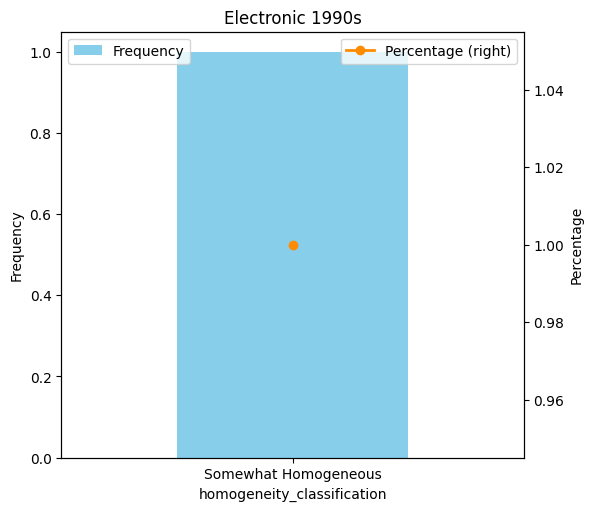

--------------   Folk   -------------- 
                            Count  Percentage
homogeneity_classification                   
Somewhat Homogeneous            1         1.0


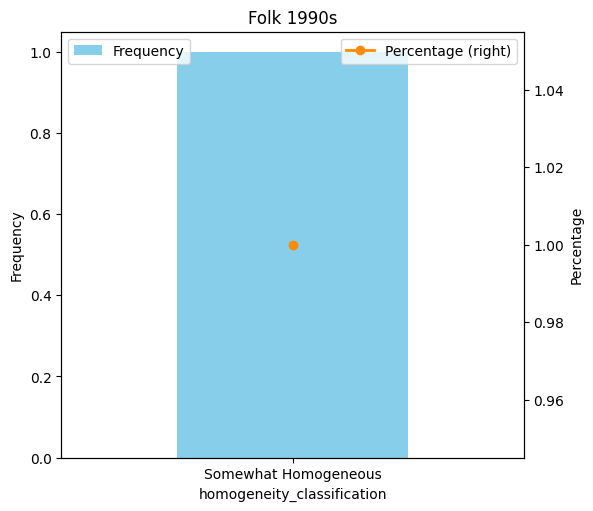

 ***************** Korea, Republic of ******************+
--------------   K-Pop   -------------- 
                            Count  Percentage
homogeneity_classification                   
Homogeneous                     7    0.411765
Somewhat Homogeneous            6    0.352941
Heterogeneous                   4    0.235294


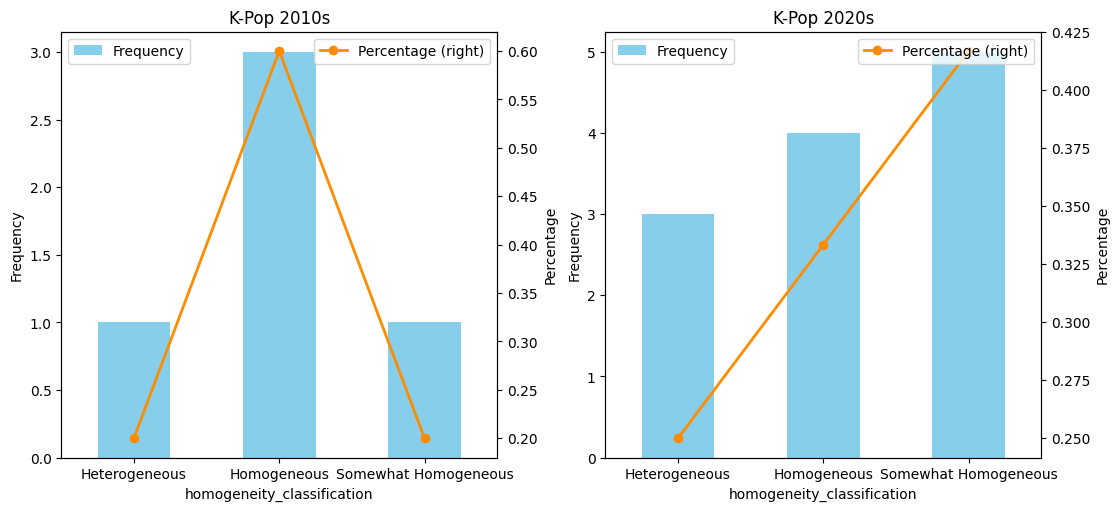

--------------   Pop   -------------- 
                            Count  Percentage
homogeneity_classification                   
Homogeneous                     7    0.388889
Somewhat Homogeneous            7    0.388889
Heterogeneous                   4    0.222222


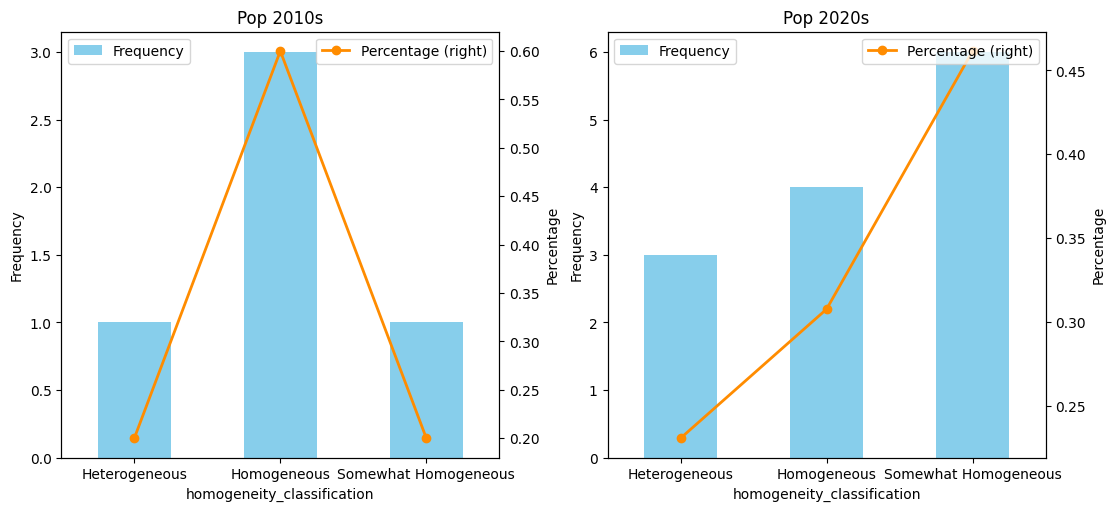

--------------   African   -------------- 
Empty DataFrame
Columns: [Count, Percentage]
Index: []


ValueError: Number of rows must be a positive integer, not 0

<Figure size 2000x0 with 0 Axes>

In [159]:
for country in frequent_countries:
    country_df = df[df['location']==country]
    print(f" ***************** {country} ******************+")
    genre_list_country = lists_countries[country]
    for gen in genre_list_country:
        print(f"--------------   {gen}   -------------- ")
        column_name = "homogeneity_classification"
        genre_df = country_df[country_df['big_genres'].str.contains(gen, na=False)]
        df_counts, df_percentages = get_classification_count(genre_df,column_name)
    
        pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
        #print(pivot_table_p)
        #print(pivot_table_percentage_p)
        plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### energy_classification

In [ ]:
for country in frequent_countries:
    country_df = df[df['location']==country]
    print(f" ***************** {country} ******************+")
    genre_list_country = lists_countries[country]
    for gen in genre_list_country:
        print(f"--------------   {gen}   -------------- ")
        column_name = "energy_classification"
        genre_df = country_df[country_df['big_genres'].str.contains(gen, na=False)]
        df_counts, df_percentages = get_classification_count(genre_df,column_name)
    
        pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
        print(pivot_table_p)
        print(pivot_table_percentage_p)
        #plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### 	correlation_classification


In [ ]:
for country in frequent_countries:
    country_df = df[df['location']==country]
    print(f" ***************** {country} ******************+")
    genre_list_country = lists_countries[country]
    for gen in genre_list_country:
        print(f"--------------   {gen}   -------------- ")
        column_name = "correlation_classification"
        genre_df = country_df[country_df['big_genres'].str.contains(gen, na=False)]
        df_counts, df_percentages = get_classification_count(genre_df,column_name)
    
        pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
        print(pivot_table_p)
        print(pivot_table_percentage_p)
        #plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### use_space_classification


In [ ]:
for country in frequent_countries:
    country_df = df[df['location']==country]
    print(f" ***************** {country} ******************+")
    genre_list_country = lists_countries[country]
    for gen in genre_list_country:
        print(f"--------------   {gen}   -------------- ")
        column_name = "use_space_classification"
        genre_df = country_df[country_df['big_genres'].str.contains(gen, na=False)]
        df_counts, df_percentages = get_classification_count(genre_df,column_name)
    
        pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
        print(pivot_table_p)
        print(pivot_table_percentage_p)
        #plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### 	simmetry_classification


In [ ]:
for country in frequent_countries:
    country_df = df[df['location']==country]
    print(f" ***************** {country} ******************+")
    genre_list_country = lists_countries[country]
    for gen in genre_list_country:
        print(f"--------------   {gen}   -------------- ")
        column_name = "simmetry_classification"
        genre_df = country_df[country_df['big_genres'].str.contains(gen, na=False)]
        df_counts, df_percentages = get_classification_count(genre_df,column_name)
    
        pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
        print(pivot_table_p)
        print(pivot_table_percentage_p)
        #plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### warm_cool_palette


In [ ]:
for country in frequent_countries:
    country_df = df[df['location']==country]
    print(f" ***************** {country} ******************+")
    genre_list_country = lists_countries[country]
    for gen in genre_list_country:
        print(f"--------------   {gen}   -------------- ")
        column_name = "warm_cool_palette"
        genre_df = country_df[country_df['big_genres'].str.contains(gen, na=False)]
        df_counts, df_percentages = get_classification_count(genre_df,column_name)
    
        pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
        print(pivot_table_p)
        print(pivot_table_percentage_p)
        #plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)

### type_palette


In [ ]:
for country in frequent_countries:
    country_df = df[df['location']==country]
    print(f" ***************** {country} ******************+")
    genre_list_country = lists_countries[country]
    for gen in genre_list_country:
        print(f"--------------   {gen}   -------------- ")
        column_name = "type_palette"
        genre_df = country_df[country_df['big_genres'].str.contains(gen, na=False)]
        df_counts, df_percentages = get_classification_count(genre_df,column_name)
    
        pivot_table_p, pivot_table_percentage_p = get_pivot_table(genre_df, column_name)
        print(pivot_table_p)
        print(pivot_table_percentage_p)
        #plot_decades_classification(pivot_table_p, pivot_table_percentage_p, genre=gen)